# Import Statements

We import all the statements below so that they do not take up place throughour the project.

In [4]:
import pandas as pd
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# Load File

We start by uploading our file thats located in the same folder

In [7]:
df = pd.read_csv('Last_Year_All_Field_Bridges.csv')

# Data Description

We display a couple of descriptive data in order to see what we are working with. Our info() provides how many entries, the data distribution in terms of types and how many columns we have.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15034 entries, 0 to 15033
Columns: 143 entries, 1 - State Code to State House District
dtypes: float64(52), int64(40), object(51)
memory usage: 16.4+ MB


We print some description of our numerical data data and we see instantly that we do have some missing values, we have some 0 values as minimum that we should investigate a bit further as to whether they are also missing values or actual data.

In [12]:
df.describe()

1 - State Code  3 - County Code  4 - Place Code  \
count         15034.0     15034.000000    15034.000000   
mean             13.0       150.025409     6866.670613   
std               0.0        90.174482    18186.547769   
min              13.0         1.000000        0.000000   
25%              13.0        71.000000        0.000000   
50%              13.0       135.000000        0.000000   
75%              13.0       225.000000        0.000000   
max              13.0       321.000000    85128.000000   

       City - InfoBridge Place Code  27 - Year Built  \
count                  15034.000000     15034.000000   
mean                   10106.553346      1976.137754   
std                    21557.774322        22.785257   
min                        0.000000      1872.000000   
25%                        0.000000      1960.000000   
50%                        0.000000      1976.000000   
75%                     4000.000000      1993.000000   
max                    85128.000000      2022.000000   

       29 - Average Daily Traffic  45 - Number of Spans in Main Unit  \
count                15034.000000                       15034.000000   
mean                  9190.575895                           3.866702   
std                  23590.832421                           3.394178   
min                      0.000000                           0.000000   
25%                    490.000000                           3.000000   
50%                   1710.000000                           3.000000   
75%                   6990.000000                           4.000000   
max                 335210.000000                         104.000000   

       49 - Structure Length (ft.)  Bridge Age (yr)  \
count                 15034.000000     15034.000000   
mean                    154.968265        45.862246   
std                     264.082846        22.785257   
min                      20.000000         0.000000   
25%                      32.200000        29.000000   
50%                      82.000000        46.000000   
75%                     198.200000        62.000000   
max                    8852.000000       150.000000   

       CAT29 - Deck Area (sq. ft.)  ...  Maximum Temperature  Mean Wind Speed  \
count                 15034.000000  ...         14815.000000     14815.000000   
mean                   7570.099102  ...            37.163584         0.780830   
std                   17803.987623  ...             1.156920         0.805902   
min                     266.800000  ...            33.600000         0.000000   
25%                     805.100000  ...            36.300000         0.000000   
50%                    2812.600000  ...            37.000000         1.000000   
75%                    8347.950000  ...            37.900000         1.000000   
max                  723147.700000  ...            44.300000         2.000000   

       Minimum Temperature  Number of Freeze-Thaw Cycles  \
count         14815.000000                           0.0   
mean             -4.750597                           NaN   
std               1.670655                           NaN   
min              -9.100000                           NaN   
25%              -6.200000                           NaN   
50%              -5.100000                           NaN   
75%              -3.400000                           NaN   
max               2.300000                           NaN   

       Number of Snowfall Days  Number of Days with Measurable Precipitation  \
count                      0.0                                  14815.000000   
mean                       NaN                                    119.145326   
std                        NaN                                      7.876606   
min                        NaN                                    107.000000   
25%                        NaN                                    111.000000   
50%                        NaN                                    118.000000   
75%

## Rename columns for cleanliness

We saw above that our column names were a bit hard to read so we simplify it in order to have consitant names for our columns and we display the description in order to check that the renaming worked.

In [15]:
df.columns = [col.split(" - ")[-1] if " - " in col else col for col in df.columns]

In [16]:
df.describe()

State Code   County Code    Place Code  InfoBridge Place Code  \
count     15034.0  15034.000000  15034.000000           15034.000000   
mean         13.0    150.025409   6866.670613           10106.553346   
std           0.0     90.174482  18186.547769           21557.774322   
min          13.0      1.000000      0.000000               0.000000   
25%          13.0     71.000000      0.000000               0.000000   
50%          13.0    135.000000      0.000000               0.000000   
75%          13.0    225.000000      0.000000            4000.000000   
max          13.0    321.000000  85128.000000           85128.000000   

         Year Built  Average Daily Traffic  Number of Spans in Main Unit  \
count  15034.000000           15034.000000                  15034.000000   
mean    1976.137754            9190.575895                      3.866702   
std       22.785257           23590.832421                      3.394178   
min     1872.000000               0.000000                      0.000000   
25%     1960.000000             490.000000                      3.000000   
50%     1976.000000            1710.000000                      3.000000   
75%     1993.000000            6990.000000                      4.000000   
max     2022.000000          335210.000000                    104.000000   

       Structure Length (ft.)  Bridge Age (yr)  Deck Area (sq. ft.)  ...  \
count            15034.000000     15034.000000         15034.000000  ...   
mean               154.968265        45.862246          7570.099102  ...   
std                264.082846        22.785257         17803.987623  ...   
min                 20.000000         0.000000           266.800000  ...   
25%                 32.200000        29.000000           805.100000  ...   
50%                 82.000000        46.000000          2812.600000  ...   
75%                198.200000        62.000000          8347.950000  ...   
max               8852.000000       150.000000        723147.700000  ...   

       Maximum Temperature  Mean Wind Speed  Minimum Temperature  \
count         14815.000000     14815.000000         14815.000000   
mean             37.163584         0.780830            -4.750597   
std               1.156920         0.805902             1.670655   
min              33.600000         0.000000            -9.100000   
25%              36.300000         0.000000            -6.200000   
50%              37.000000         1.000000            -5.100000   
75%              37.900000         1.000000            -3.400000   
max              44.300000         2.000000             2.300000   

       Number of Freeze-Thaw Cycles  Number of Snowfall Days  \
count                           0.0                      0.0   
mean                            NaN                      NaN   
std                             NaN                      NaN   
min                             NaN                      NaN   
25%                             NaN                      NaN   
50%                             NaN                      NaN   
75%                             NaN                      NaN   
max                             NaN                      NaN   

       Number of Days with Measurable Precipitation  \
count                                  14815.000000   
mean                                     119.145326   
std                                        7.876606   
min                                      107.000000   
25%                                      111.000000   
50%                                      118.000000   
75%                                      126.000000   
max                                      141.000000   

       Number of Days with Temperature Below 0?C  Prevailing Wind Direction  \
count                               14815.000000               14815.000000   
mean                                   30.691461                 163.026798   
std                                    18.664538                 

## Dropping "Code" and "Name" Features

We decided by dropping columns that we judged would hold no predictive power because they are either names or codes and these do not contribute to predictions for our dataset.

In [19]:
keywords = ['code','name']

# this part just goes through the code and sees if the keyword we defined before is present in the columns or now
column_drop = [col for col in df.columns if any(keyword in col.lower() for keyword in keywords)]
df = df.drop(columns=column_drop, axis=1)

# just to double check, we print
df.shape

(15034, 111)

## Dropping Other "Code" Related Categories

We looked into other features that were code mimics, like "Structure Number" and "Route Number". We didn't want to drop every feature with the term "Number" as some features we deemed import, hence dropping directly instead by keywords.
We then verify that everything dropped correctly.

In [22]:
df = df.drop(['Structure Number', 'Route Number'], axis=1)

# we display the new list to check what we are working with now
df.shape

(15034, 109)

## Check for missing values

The next step is to go through the missing values, as in the cells that do not hold any information. We decide to print out the missing values by percentage as it is generally alright to remove data that has 50-60% of their data missing as it would lead to alot of bias if we proceed to impute that much data.

In [25]:
# here we display the isnull values and turn into percentage. We then display it in a descending order.
missing_values = (df.isnull().sum()[df.isnull().sum() > 0]) / len(df) * 100
missing_values.sort_values(ascending = False)

Number of Freeze-Thaw Cycles                    100.000000
Number of Snowfall Days                         100.000000
Border Bridge Structure Number                   99.654117
Neighboring State Percent Responsibility         99.654117
Fracture Critical Detail Date                    99.461221
Other Special Inspection Date                    98.270587
Year of Improvement Cost Estimate                93.128908
Underwater Inspection Date                       86.131435
Year Reconstructed                               82.712518
Work Done By                                     81.688173
Type of Work Proposed                            81.555142
Metropolitan Planning Organization (MPO)         62.026074
LRS Inventory Route                              34.056139
Subroute Number                                   1.609685
Prevailing Wind Direction                         1.456698
Time of Wetness                                   1.456698
Total Precipitation                               1.4566

## Dropping Features With High Missing Value Treshold

Seeing from the data that we have a few features that have 60% or more of their data missing, we can go ahead and drop all the 12 features.

Below, we declare a the high values be selecting all the features that have 60% or above of missing values. we then proceed to drop those features. We also double check to make sure everything is dropped.

In [29]:
values_high_missing = missing_values[missing_values > 60].index
df = df.drop(columns=values_high_missing, axis=1)

In [30]:
df.shape

(15034, 97)

## Visualize Numerical Features For More Info

In order to see what we are working with, we decided to print out a visual display of all our numerical features to decide how we are going to proceed.
Below, is the implementation of display all of the int64 and float64 features.

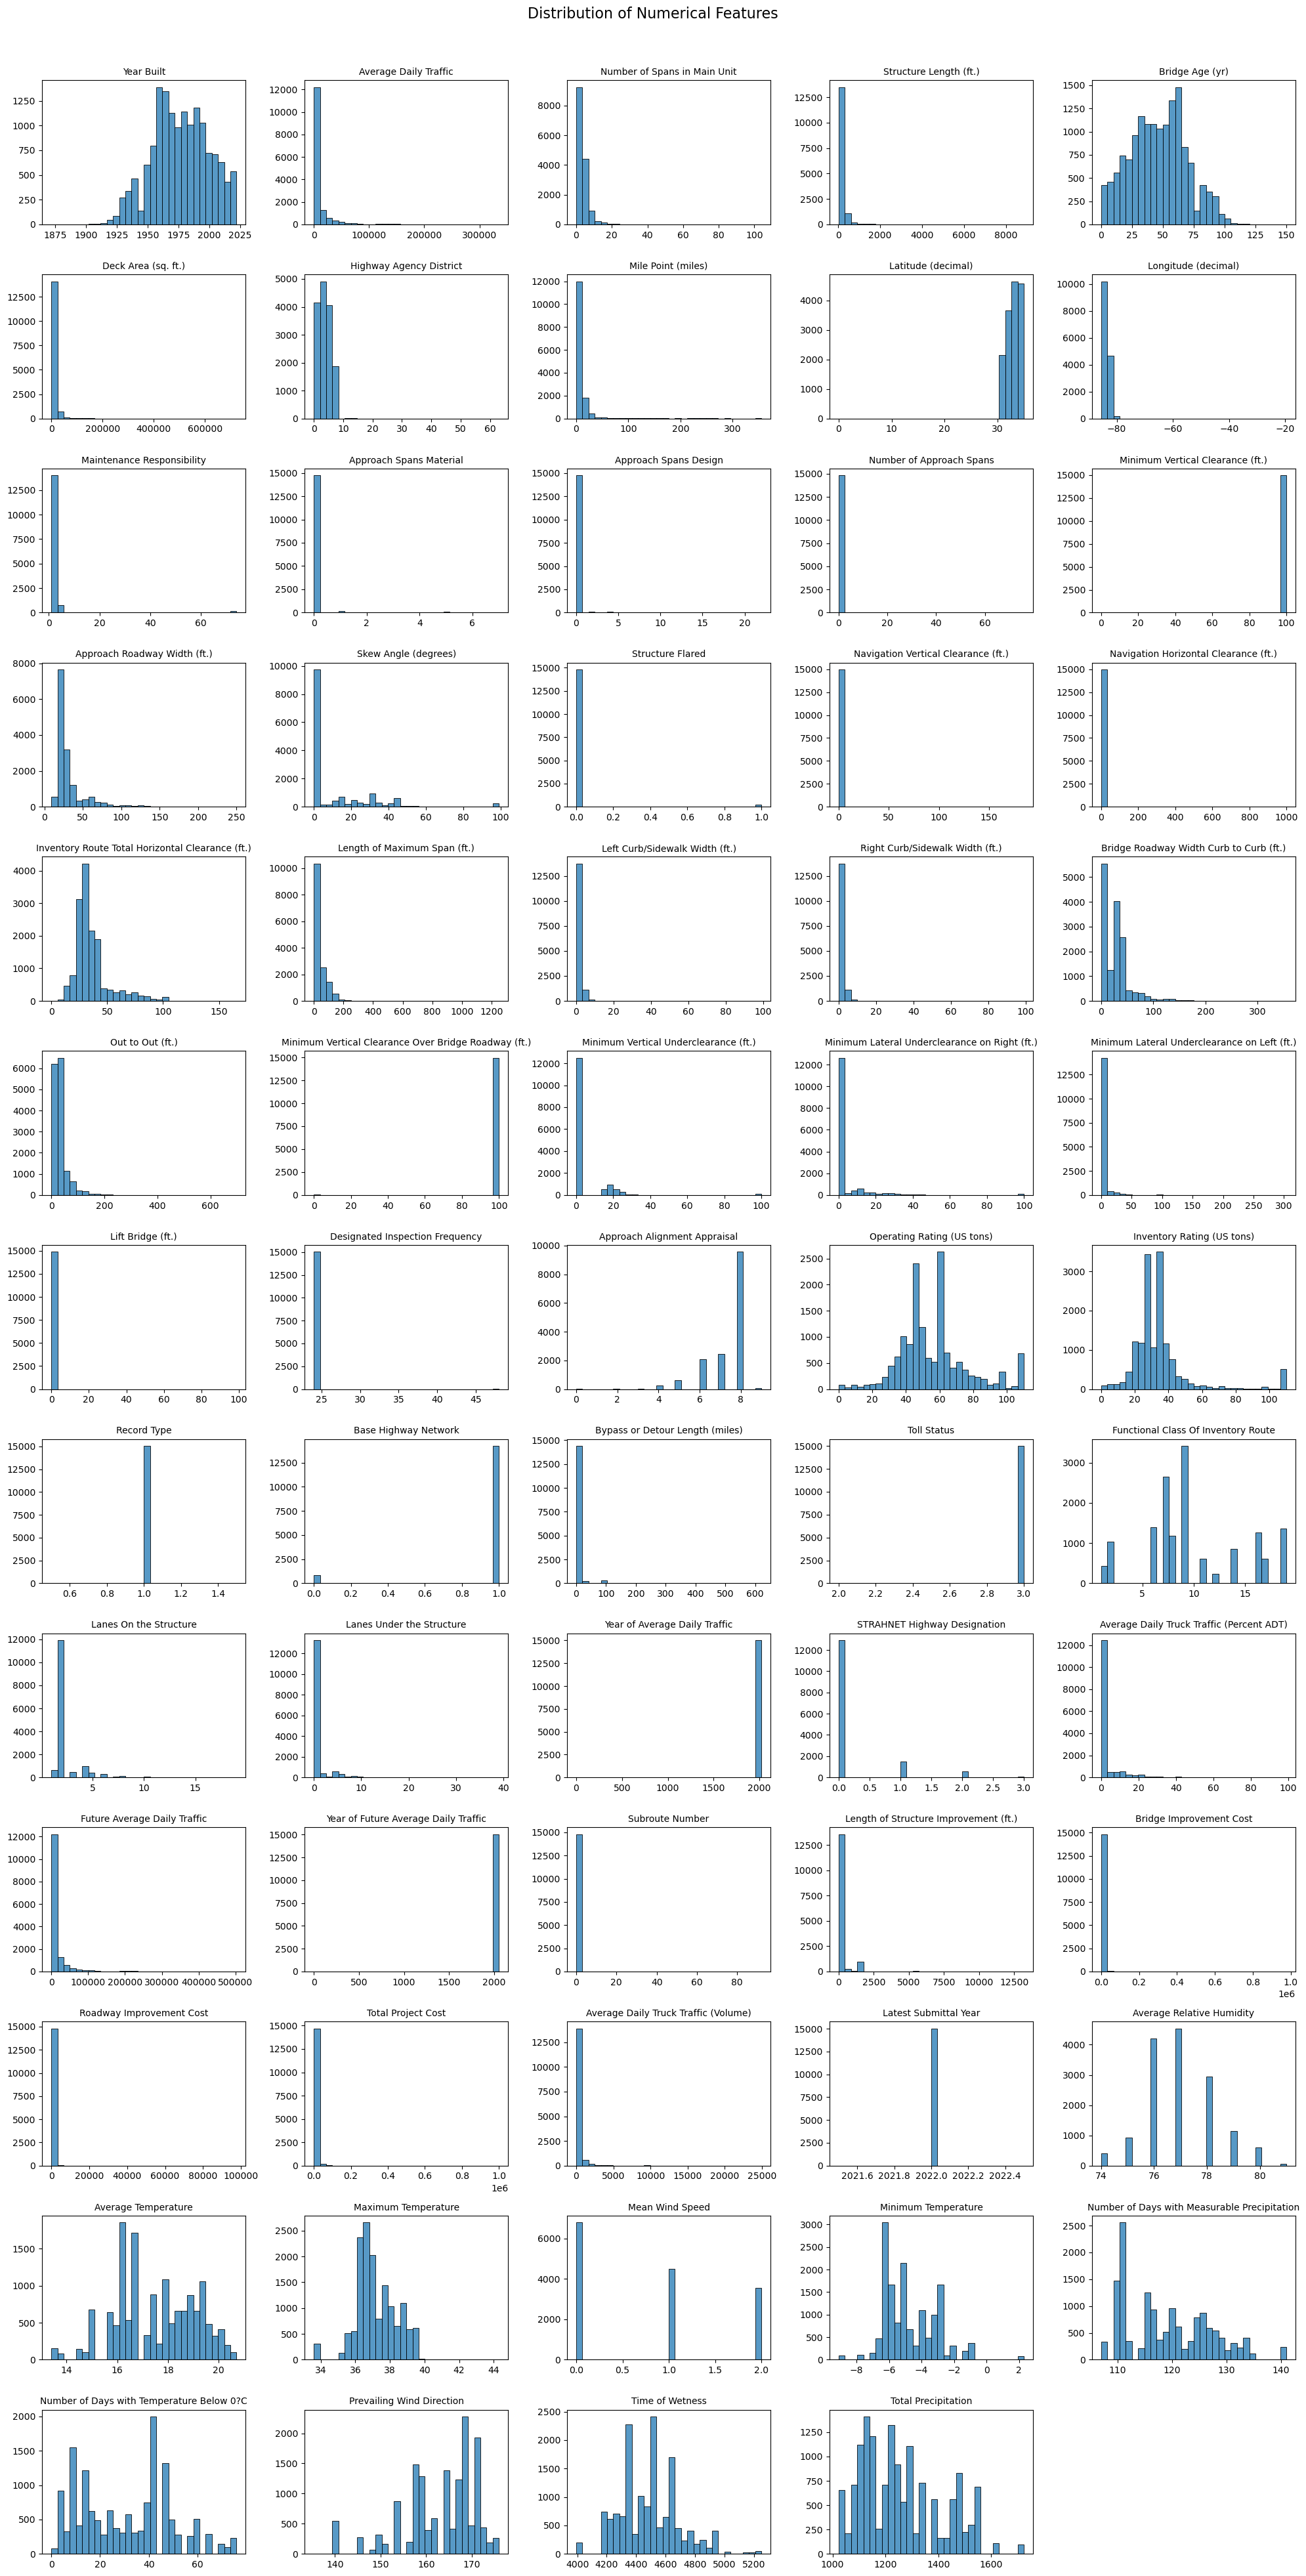

In [33]:
#Visualizing the distribution of numerical features in the dataset
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(20, 40))
plt.suptitle('Distribution of Numerical Features', fontsize=16)

# this is just so that we display all of the features as 5 per row
total_features = len(numerical_features)
rows = (total_features // 5) + 1

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(rows, 5, i)
    sns.histplot(df[feature], bins=30)
    plt.title(feature, fontsize=10)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

We look at each chart individually and made a list of each feature in order to know what we will do with the features for quick reference later on.

| **Column**                           | **Possible Action**  | **Reason**                                                                         |
|--------------------------------------|----------------------|-------------------------------------------------------------------------------------|
| Year Build/Bridge Age                | Drop                 | Redundant, will only keep one of these                                              |
| Average Daily Traffic                | Investigate          | High 0 count                                                                        |
| Number of Spans                      | Investigate          | High 0 count                                                                        |
| Structure Length                     | Investigate          | High 0 count                                                                        |
| Deck Area                            | Investigate          | High 0 count                                                                        |
| Highway Agency District              | Drop                 | Mimics a code                                                                       |
| Mile Point                           | Investigate          | High 0 count                                                                        |
| Latitude and Longitude               | Keep                 | Useful to keep                                                                      |
| Maintenance Responsibility           | Investigate          | High 0 count                                                                        |
| Approach Span Material               | Drop                 | Materials shouldn't be numerical + High 0 count                                     |
| Approach Span Design                 | Investigate          | High 0 count                                                                        |
| Number of Approach Spans             | Investigate          | High 0 count                                                                        |
| Minimum Vertical Clearance           | Drop                 | Constant value - offers no additional insight                                       |
| Skew Angle                           | Keep                 | Relevant for certain bridges                                                        |
| Structural Fare                      | Drop                 | High 0 count + unclear meaning                                                      |
| Navigation Vertical Clearance        | Investigate          | High 0 count                                                                        |
| Navigation Horizontal Clearance      | Investigate          | High 0 count                                                                        |
| Length of Span                       | Drop                 | High 0 count - data loss as span is required in a bridge                            |
| Left/Right Curb                      | Drop                 | High 0 count + not all bridges have sidewalks                                       |
| Bridge Curb to Curb                  | Investigate          | Further investigation needed                                                        |
| Out to Out                           | Investigate          | Further investigation needed                                                        |
| Minimum Vertical Clearance           | Drop                 | Mostly constant values + poor insight                                               |
| Minimum Vertical Underclearance      | Drop                 | High 0 count + poor insight                                                         |
| Min L)      l Clearance (Right/L   eft) | Investigate       | High 0 count                                               |                        |
| Lift Bridge                          | Investigate          | High 0 count                                                                        |
| Designated Inspection Frequency      | Drop                 | Mostly constant values                                                              |
| Approach Alignment Appraisal         | Investigate          | Further investigation needed                                                        |
| Record Type                          | Drop                 | Binary value + unclear meaning                                                      |
| Base Highway Network                 | Investigate          | Further evaluation needed                                                           |
| Bypass or Detour                     | Investigate          | High 0 count                                                                        |
| Toll Status                          | Drop                 | Constant value                                                                      |
| Functional Class of Inventory Route  | Investigate          | Further investigation needed                                                        |
| Lanes on the Structure               | Investigate          | Further investigation needed                                                        |
| Lanes Under the Structure            | Investigate          | High 0 count                                                                        |
| Year of Average Daily Traffic        | Drop                 | Poor insight                                                                        |
| STRAHNET Highway Designation         | Investigate          | High 0 count                                                                        |
| Average Daily Truck Traffic (Percent)| Investigate          | High 0 count                                                                        |
| Future Average Daily Traffic         | Investigate          | High 0 count                                                                        |
| Year of Future Average Daily Traffic | Investigate          | High 0 count                                                                        |
| Subroute Number                      | Investigate          | High 0 count                                                                        |
| Length of Structure Improvement      | Investigate          | High 0 count                                                                        |
| Bridge Improvement Cost              | Investigate          | High 0 count                                                                        |
| Roadway Improvement Cost             | Investigate          | High 0 count                                                                        |
| Total Project Cost                   | Investigate          | High 0 count                                                                        |
| Average Daily Truck Traffic (Volume) | Investigate          | High 0 count                                                                        |
| Latest Submittal Year                | Investigate          | Constant value + offers no insight                                                  |
| Average Relative Humidity            | Investigate          | Further investigation needed                                                        |
| Average Temperature                  | Investigate          | Further investigation needed                                                        |
| Maximum Temperature                  | Drop                 | Disregard, keeping average temperature                                              |
| Minimum Temperature                  | Drop                 | Disregard, keeping average temperature                                              |
| Number of Days with Precipitation    | Drop                 | Disregard, keeping total precipitation                                              |
| Mean Wind Speed                      | Drop                 | Offers no insight                                                                   |
| Number of Days with Temp. Below      | Drop                 | Disregard, average temperature is more useful                                       |
| Prevailing Wind Direction            | Drop                 | Offers no insight                                                                   |
| Time of Wetness                      | Drop                 | Offers no insight                                                                   |
| Total Precipitation                  | Investigate          | Further investigation needed                                                       |
                                                       |

information
total precipitation - further investigate


Most of the charts have a lot of 0 values, which either indicates missing values, or an actual value but the missing value is declared as "0" for missing.
Our next step is to actually investigate if the data provides insight or if its just missing values. If there is a very high value count we can consider dropping the feature applying the same logic as dropping high missing value counts we did earlier.

## Cleaning Numerical Features With High "0" Values

We check here for high values of 0s using the same technique as we did with the missing values earlier. we then display the results in descending order, so from high to low.

In [39]:
zero_values = (df.select_dtypes(include=['int64', 'float64']) == 0).sum() / len(df) * 100
zero_values[zero_values > 0].sort_values(ascending = False)

Navigation Horizontal Clearance (ft.)                   99.560995
Navigation Vertical Clearance (ft.)                     99.541040
Lift Bridge (ft.)                                       98.955700
Structure Flared                                        98.476786
Subroute Number                                         98.377012
Number of Approach Spans                                98.110949
Approach Spans Design                                   98.051084
Approach Spans Material                                 97.984568
Minimum Lateral Underclearance on Left (ft.)            90.893974
Lanes Under the Structure                               88.027138
STRAHNET Highway Designation                            85.998404
Minimum Lateral Underclearance on Right (ft.)           83.384329
Minimum Vertical Underclearance (ft.)                   83.018491
Length of Structure Improvement (ft.)                   78.023148
Right Curb/Sidewalk Width (ft.)                         74.710656
Left Curb/

## We drop the values with more than 60%

We went through all the high values with 0 and evaluate if they actually are missing values or if "0" is part of actual data. Furthermore, since 0 in most of these features represented a high constant value, we established that it would not provide additional insight to our predictions.

In [42]:
# we drop the features with a threshold of above 60% as we did before and check the shape after to make sure things worked
columns_with_zeros_60_percent = zero_values[zero_values >= 60].index
df = df.drop(columns= columns_with_zeros_60_percent, axis=1)
df.shape

(15034, 80)

## Assessing Remaining Features

We go through the remaining of the features and have evaluated that the following features can be considered to be dropped for the following reasons:

### Incomplete Information
- **Prevailing Wind Direction** - No insight (Data is in numerical form and not sure what they represent)
- **Time of Wetness** - No insight (Confusing information, we already have total precipitation that can reflect the same information)
- **Mean Wind Speed** - No insight (Confusing information)

### No Insight
- **Latest Submittal Year** - Constant value; due to that, it offers no insight.
- **Toll Status** - Constant value, offers no further insight.
- **Designated Inspection Frequency** - High cardinality, offers no insight.
- **Inventory Route - Minimum Vertical Clearance** - Constant value; offers no insight.
- **Record Type** - Remove; it's only 1 and a binary value, not sure what it means for the record.
- **Highway Agency District** - Confusing information.
- **Year of Average Daily Traffic** - Confusing information.
- **Future Average Daily Traffic** - Future value, does not affect predictions.
- **Year of Future Average Daily Traffic** - High cardinality, offers no insight.

### Redundant
- **Year/Age** - Redundant. We keep "Bridge Age" instead.

### Less Useful
- **Number of Days with Temperature Below** - Average temperature will be more of a useful criterion; disregard
- **Maximum Temperature** - Disregard as we keep the average temperature
- **Minimum Temperature** - Disregard as we keep the average temperature
- **Number of Days with Measurable Precipitation** - Disregard as we keep total precipitation as a featureard, keeping total precipitation |
ard, keeping total precipitation |
ard, keeping total precipitation |
ipitation as a feature


After analyzing, we declare the further variables and features in order to drop them all at once.

In [47]:
incomplete = ['Prevailing Wind Direction', 'Time of Wetness', 'Mean Wind Speed']
no_insight = ['Latest Submittal Year', 'Toll Status', 'Designated Inspection Frequency', 
              'Record Type', 'Minimum Vertical Clearance (ft.)',
              'Highway Agency District', 'Year of Average Daily Traffic', 
              'Future Average Daily Traffic', 'Year of Future Average Daily Traffic']
redundant = ['Year Built']
not_useful= ['Number of Days with Temperature Below 0?C', 'Maximum Temperature', 
             'Minimum Temperature', 'Number of Days with Measurable Precipitation']

full_drop = incomplete + no_insight + redundant + not_useful

In [48]:
# drop and check the data now
df = df.drop(columns=full_drop, axis=1)
df.shape

(15034, 63)

In [49]:
df.columns

Index(['Owner Agency', 'Average Daily Traffic', 'Main Span Material',
       'Main Span Design', 'Number of Spans in Main Unit',
       'Structure Length (ft.)', 'Features Intersected',
       'Facility Carried By Structure', 'Bridge Condition', 'Bridge Age (yr)',
       'Deck Area (sq. ft.)', 'Location', 'Mile Point (miles)',
       'Latitude (decimal)', 'Longitude (decimal)',
       'Maintenance Responsibility', 'Approach Roadway Width (ft.)',
       'Inventory Route Total Horizontal Clearance (ft.)',
       'Length of Maximum Span (ft.)',
       'Bridge Roadway Width Curb to Curb (ft.)', 'Out to Out (ft.)',
       'Minimum Vertical Clearance Over Bridge Roadway (ft.)',
       'Inspection Date', 'Fracture Critical Details', 'Underwater Inspection',
       'Other Special Inspection', 'Bridge Railings', 'Transitions',
       'Approach Guardrail', 'Bridge Guardrail Ends', 'Deck Condition Rating',
       'Superstructure Condition Rating', 'Substructure Condition Rating',
       'Channel 

# Further Investigation on Numerical Feature

We noticed alot of constant 1 values as well that offered no additional insight to  our dataset so we removed them as well using the same process as with checking with 0 values.

In [52]:
one_values = (df.select_dtypes(include=['int64','float64']) == 1).sum() / len(df) * 100
one_values[one_values > 0].sort_values(ascending = False)

Base Highway Network                         94.585606
Average Daily Truck Traffic (Percent ADT)    80.490887
Maintenance Responsibility                   45.523480
Mile Point (miles)                           17.553545
Number of Spans in Main Unit                  9.059465
Average Daily Truck Traffic (Volume)          6.738060
Lanes On the Structure                        4.237063
Functional Class Of Inventory Route           2.873487
Roadway Improvement Cost                      0.884661
Bridge Improvement Cost                       0.858055
Bridge Age (yr)                               0.658507
Inventory Rating (US tons)                    0.099774
Average Daily Traffic                         0.019955
Bypass or Detour Length (miles)               0.006652
dtype: float64

Since these features have high cardinality of one values, they would offer no additional insight on our predictions.
We apply the same process, using 60% threshold for our values with 1 values.

In [54]:
columns_with_ones_60_percent = one_values[one_values >= 60].index
df = df.drop(columns= columns_with_ones_60_percent, axis=1)
df.shape

(15034, 61)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15034 entries, 0 to 15033
Data columns (total 61 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Owner Agency                                          15034 non-null  object 
 1   Average Daily Traffic                                 15034 non-null  int64  
 2   Main Span Material                                    15034 non-null  object 
 3   Main Span Design                                      15034 non-null  object 
 4   Number of Spans in Main Unit                          15034 non-null  int64  
 5   Structure Length (ft.)                                15034 non-null  float64
 6   Features Intersected                                  15034 non-null  object 
 7   Facility Carried By Structure                         15034 non-null  object 
 8   Bridge Condition                                      15

## Remaining Features

After going through this numerical feature cleaning, we have the following columns left to work with. 

## Quick Visualisation

Now that we have more of an overview of our data we can proceed to see how some variables relate to eachother

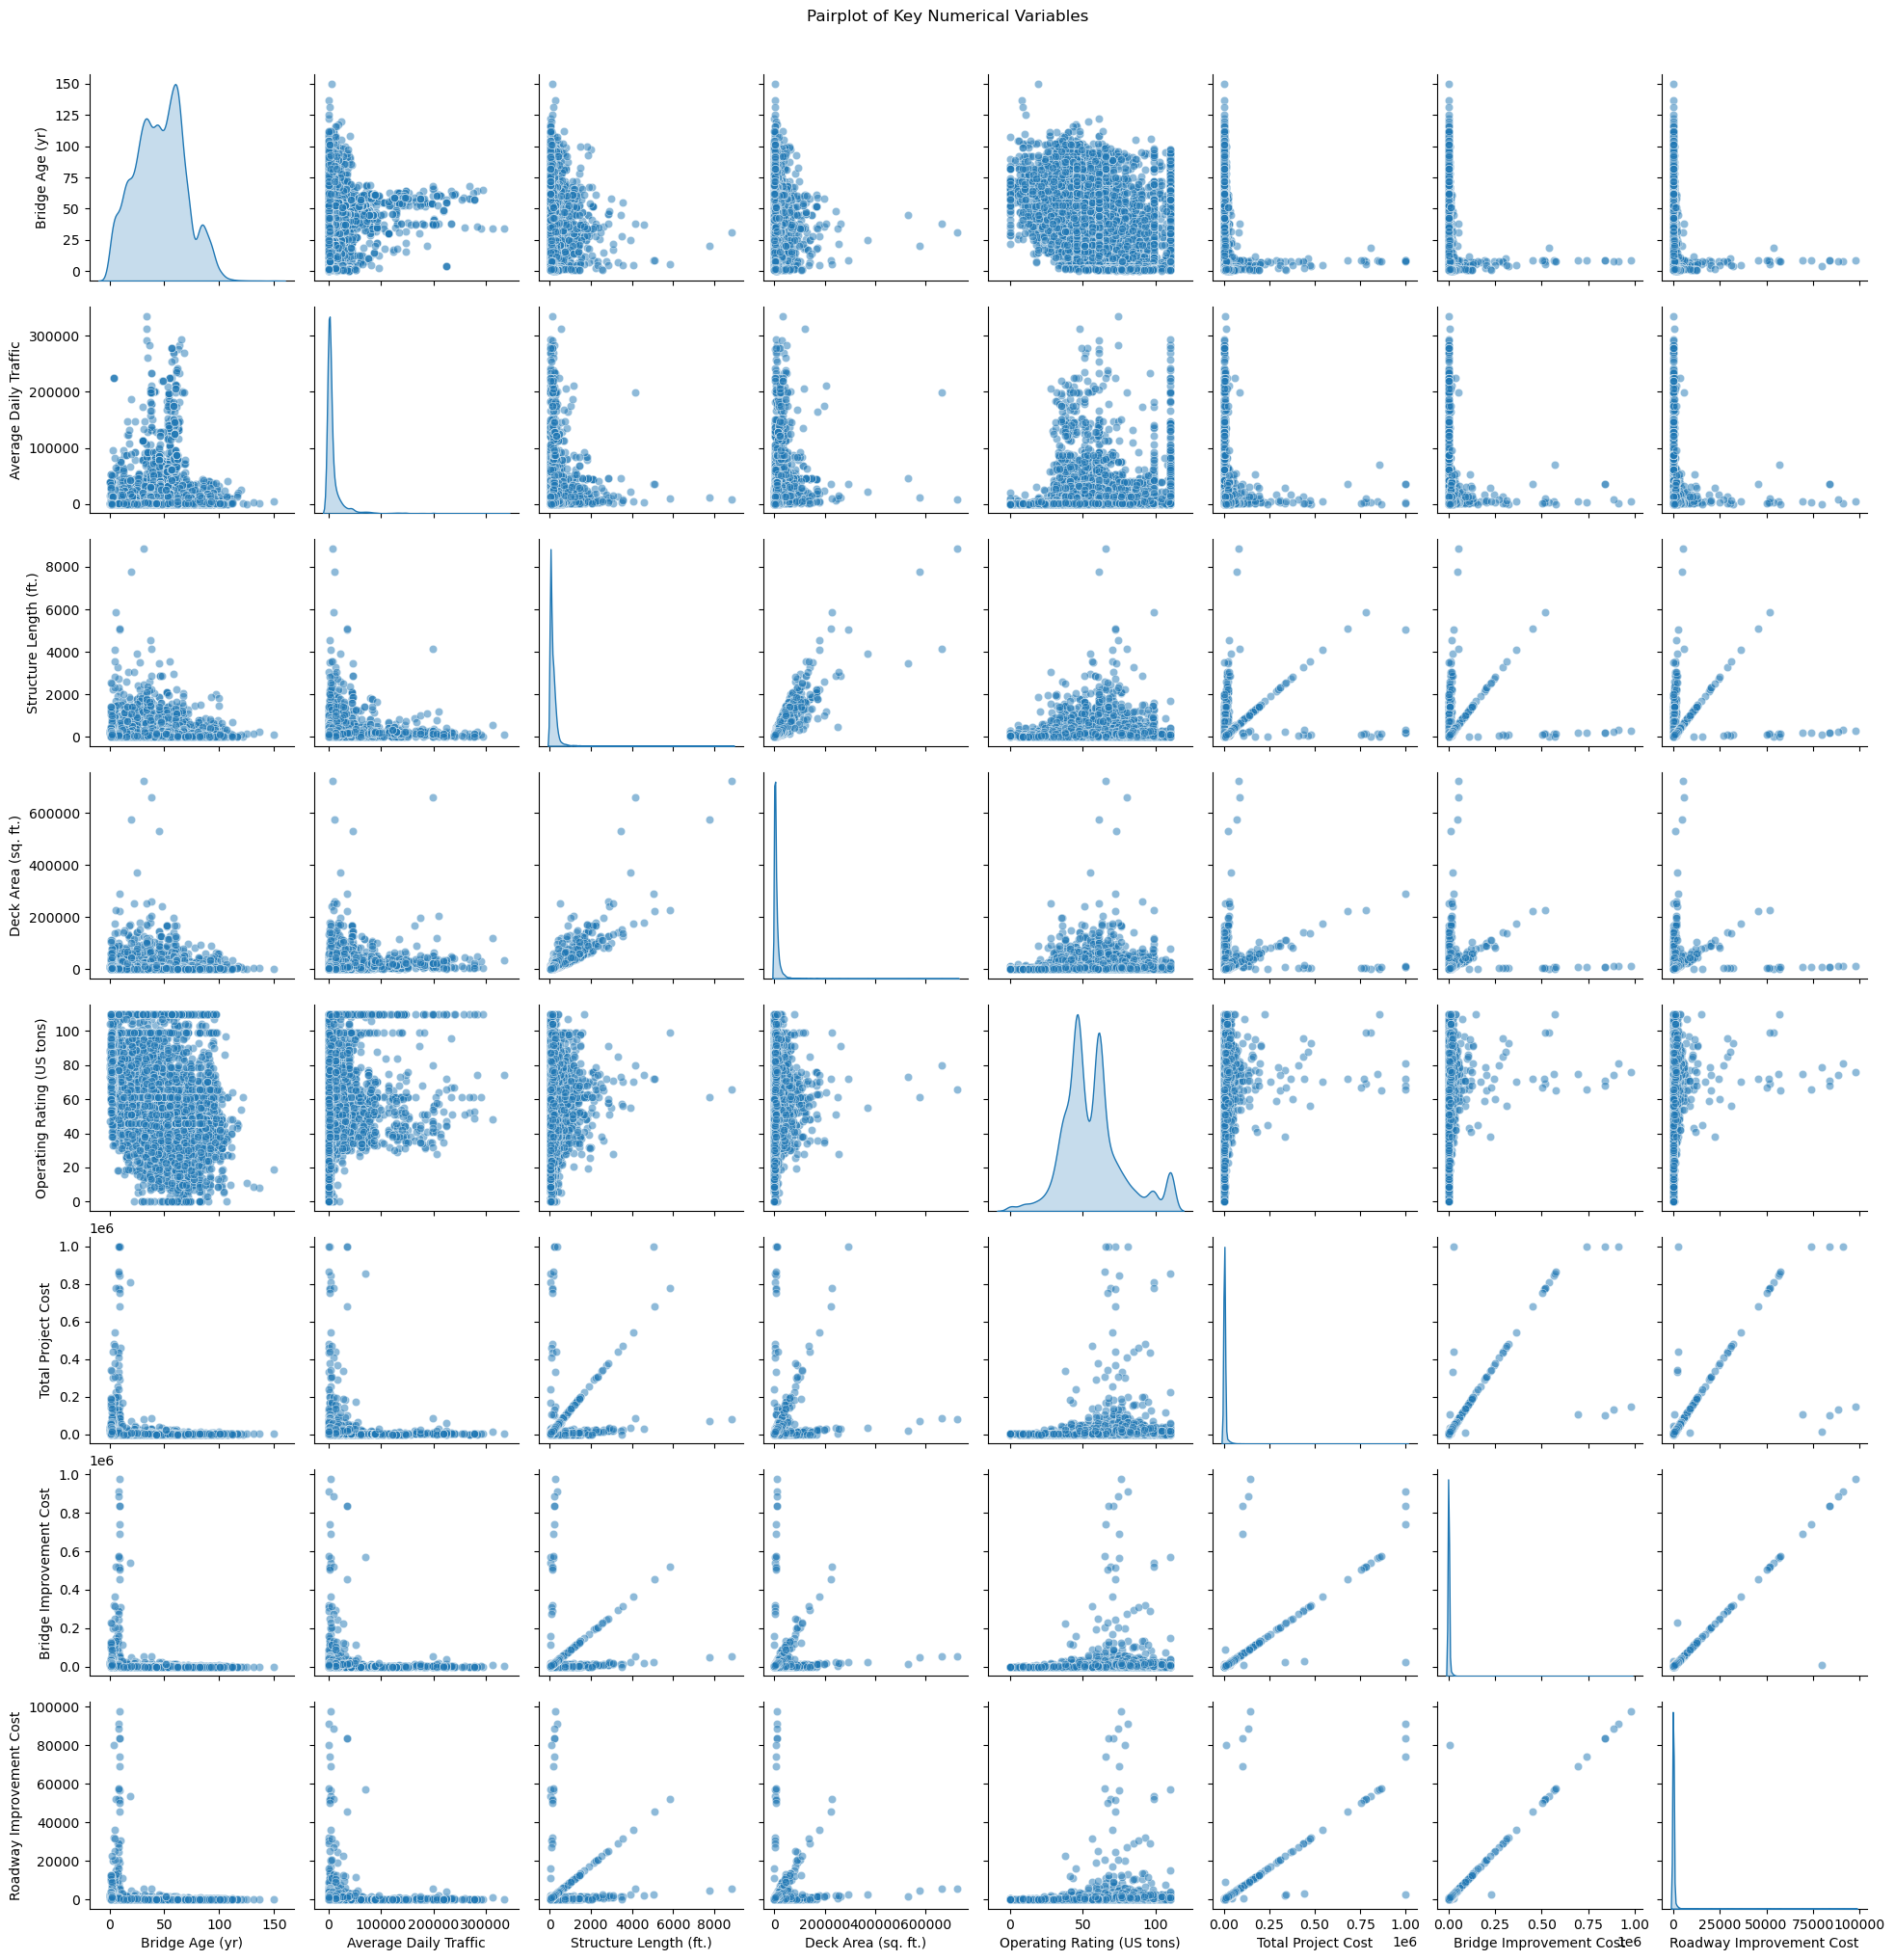

In [60]:
pairplot_columns = ['Bridge Age (yr)', 'Average Daily Traffic', 'Structure Length (ft.)', 
                    'Deck Area (sq. ft.)', 'Operating Rating (US tons)', 'Total Project Cost','Bridge Improvement Cost',
                   'Roadway Improvement Cost']
sns.pairplot(df[pairplot_columns].dropna(), diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot of Key Numerical Variables', y=1.02)
plt.show()

Here we can see that the pairplot shows that some features are correlated (we can see it with the features relating to cost correlates with eachother, which makes sense. There is correlation with the "Structure Length" with "Cost" and "Deck Area" which also makes sense.

Others do not show strong relationships. Since some are unclear, we evaluated that we would further look into this with cluster analysis just to see if these features interact with each other and influence our target variable.

Before proceeding to cluster analysis, we need to make sure that our categorical features are cleaned and finally that imputation is done.

## Cleaning Categorical Features

For cleaning up the categorical features, we want to evaluate the following:
- Check for mixed data
- Check for constant values
- check for missing values (We have N and * values in our features, we need to handle that appropriately)
- check for high cardinality

## Quick visualisation For Evaluation

We quickly look at some charts in order to see how are data is distributed and how to evaluate each feature individually.

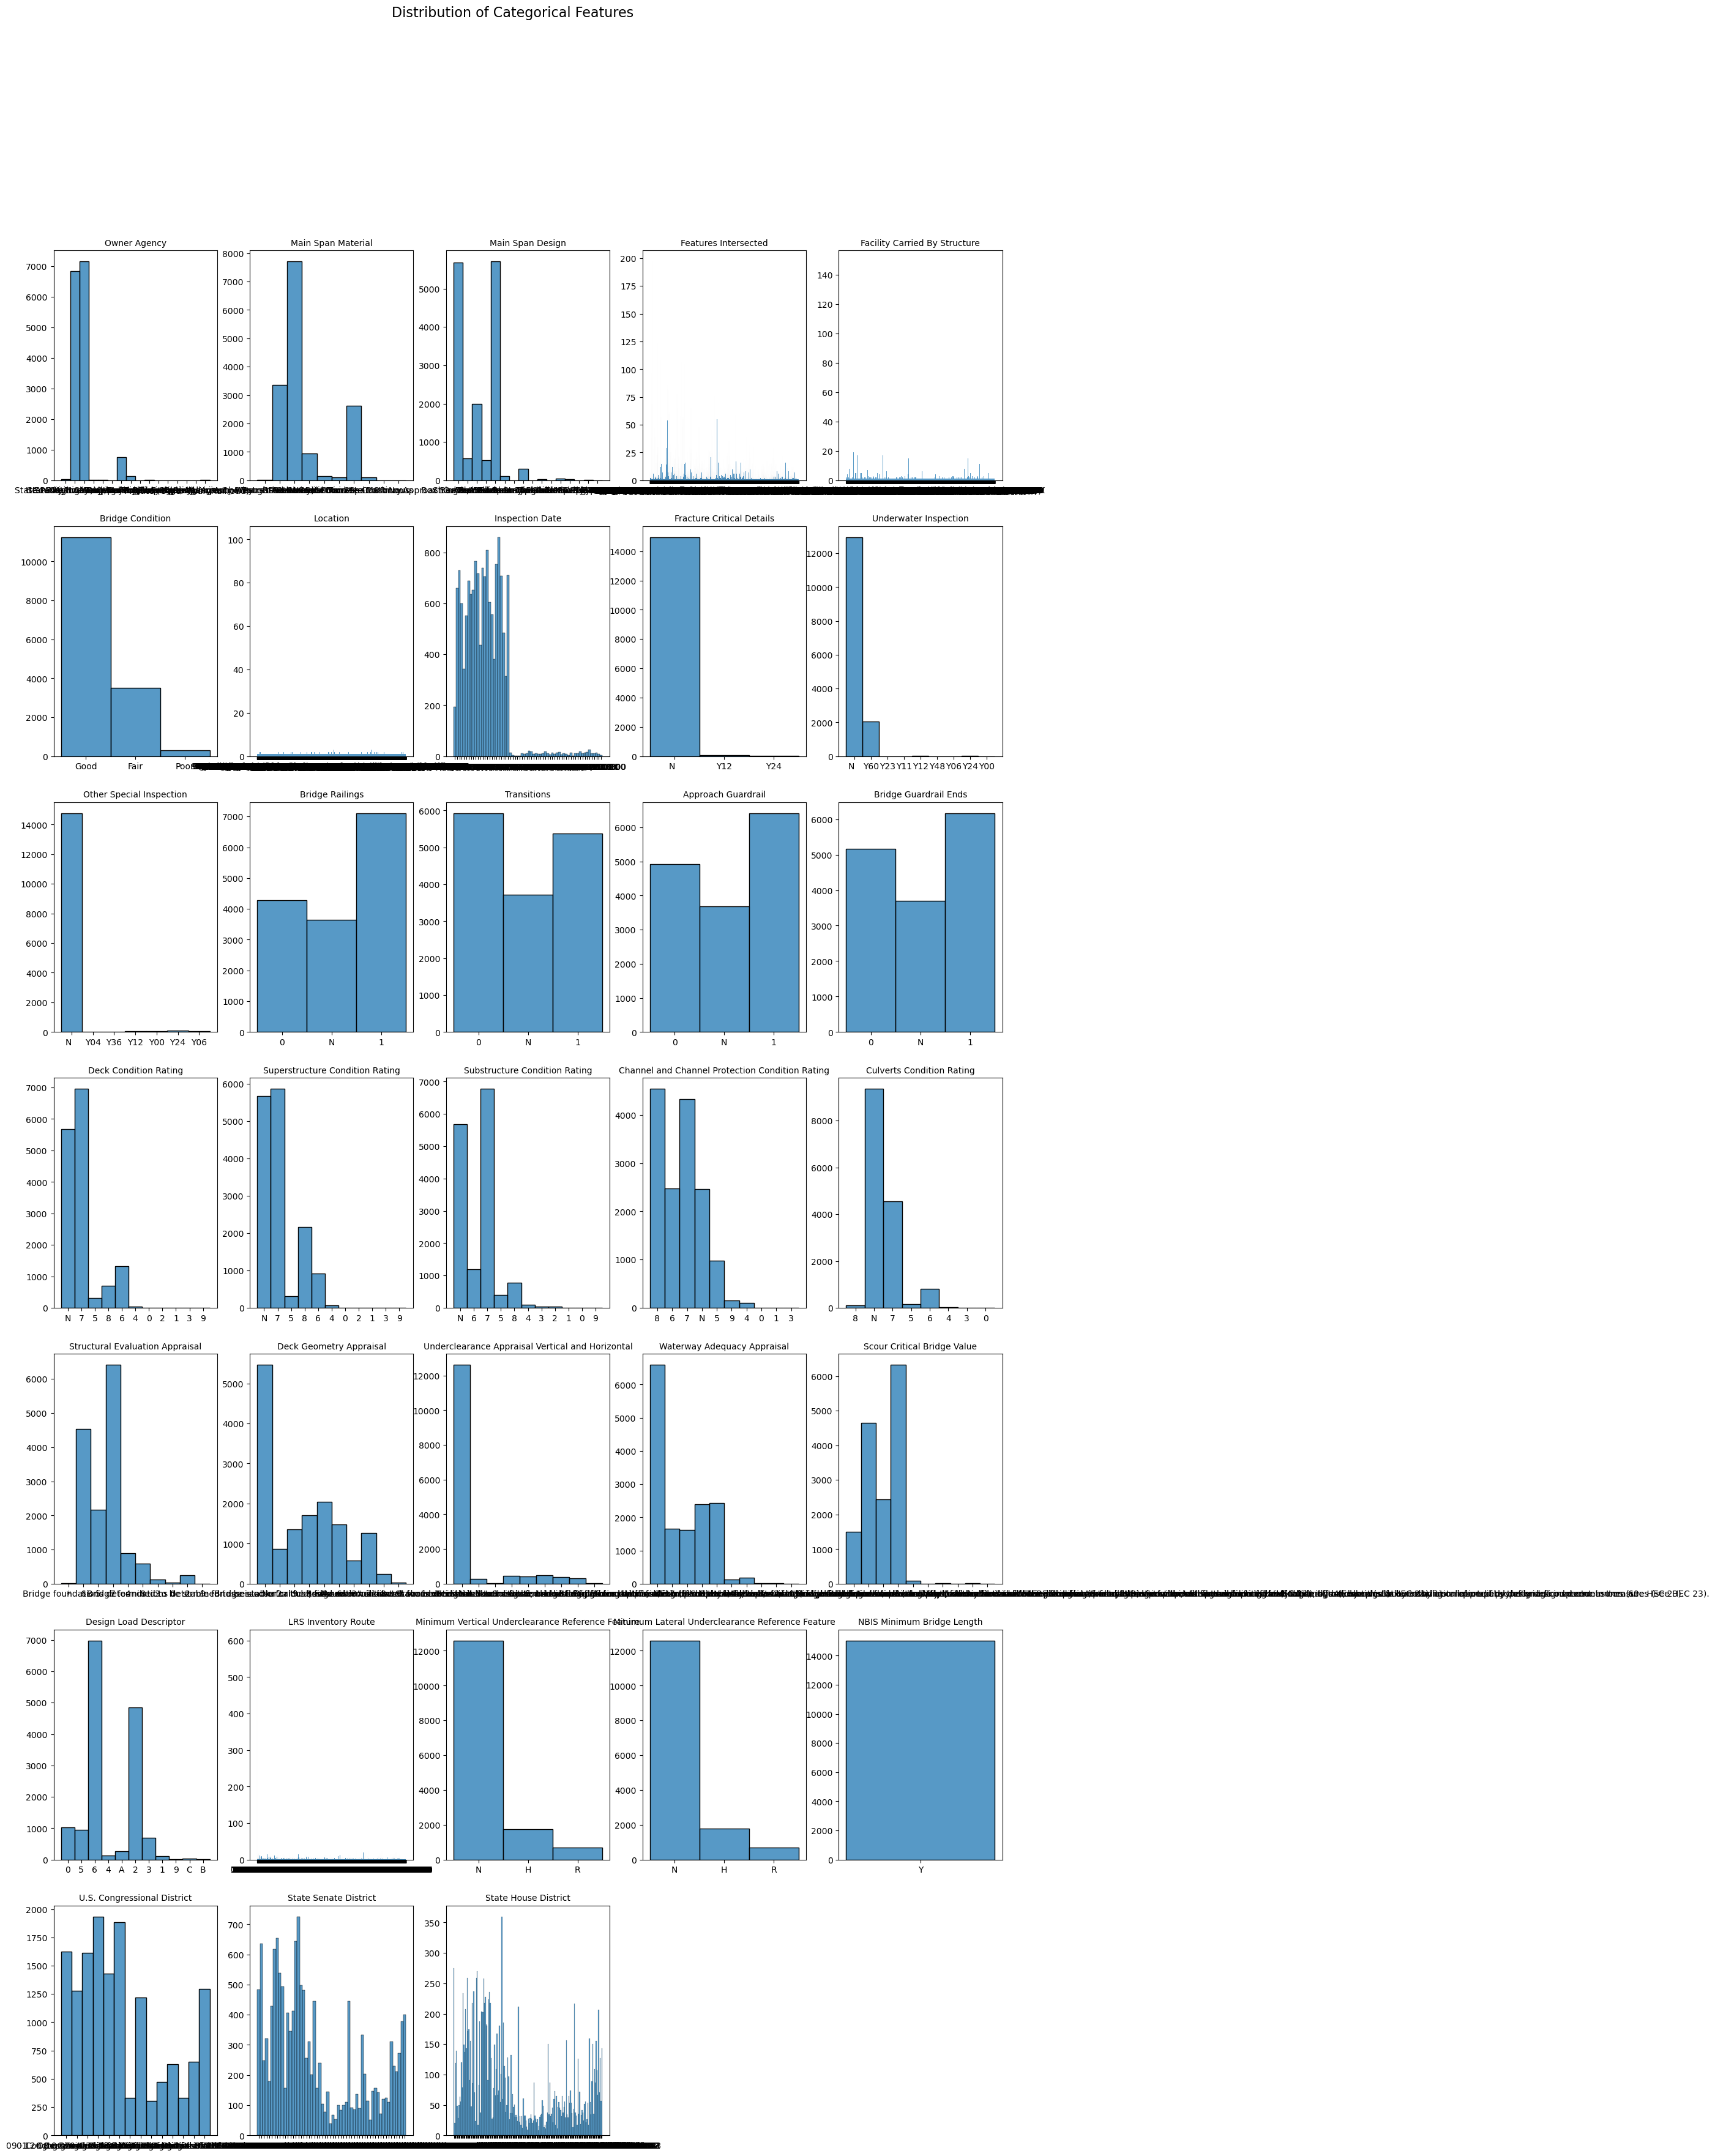

In [66]:
categorical_features = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(20, 40))
plt.suptitle('Distribution of Categorical Features', fontsize=16)

total_cat_features = len(categorical_features)
rows = (total_cat_features // 5) + 1

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(rows, 5, i)
    sns.histplot(df[feature], bins=30)
    plt.title(feature, fontsize=10)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

## Individual Column Investigation


| **Column**                                | **Action**                | **Reason**                                             |
|-------------------------------------------|---------------------------|--------------------------------------------------------|
| Main Span Material                        | Investigate               | Further investigation needed                           |
| Main Span Design                          | Investigate               | Further investigation needed                           |
| Features Intersected                      | Investigate               | Further investigation needed                           |
| Inspection Date                           | Investigate/Group by Year | Further investigation, consider grouping by year       |
| Location                                  | Investigate               | Further investigation needed                           |
| Bridge Condition                          | Investigate               | Further investigation needed                           |
| Bridge Railing                            | Investigate/Consider Drop | High N value - decide what to do                       |
| Transitions                               | Investigate/Consider Drop | High N value - decide what to do                       |
| Approach Guardrail                        | Investigate/Consider Drop | High N value - decide what to do                       |
| Bridge Guardrail Ends                     | Investigate/Consider Drop | High N value - decide what to do                       |
| Channel and Channel Protection            | Investigate               | Further investigation needed                           |
| Substructure Condition Rating             | Investigate               | Further investigation needed                           |
| Superstructure Condition Rating           | Investigate               | Further investigation needed                           |
| Deck Condition Rating                     | Investigate               | Further investigation needed                           |
| Structural Evaluation Appraisal           | Investigate               | Further investigation needed                           |
| Deck Geometry Appraisal                   | Investigate               | Further investigation needed                           |
| Underclearance App Vert and Hor           | Investigate               | Further investigation needed                           |
| Waterway Adequacy Appraisal               | Investigate               | Further investigation needed                           |
| Min Lat Underclearance Reference Feature  | Investigate               | Further investigation needed                           |
| Min Vert Underclearance Reference Feature | Investigate               | Further investigation needed                           |
| LRS Inventory Route                       | Investigate               | Further investigation needed                           |
| US Congressional District                 | Investigate               | Further investigation needed                           |
| State Senate District                     | Investigate               | Further investigation needed                           |
| State House District                      | Investigate               | Further investigation needed                           |

### Not Insightful Columns

| **Column**                | **Action**          | **Reason**                                |
|---------------------------|---------------------|-------------------------------------------|
| Owner Agency              | Consider Drop       | Only two prominent values; not insightful |
| Design Load Descriptor    | Consider Drop       | Not entirely insightful                   |

### High N Values (Consider Removal)

| **Column**                    | **Action**          | **Reason**                                           |
|-------------------------------|---------------------|------------------------------------------------------|
| Fracture Critical Details     | Drop               | Only N values present; can be removed                |
| Other Special Inspection      | Drop               | Only N values present; can be disregarded            |
| Culverts Condition Rating     | Drop               | N value is prominent with no other values; remove    |
 prominent with no other values; remove |
th no other values; remove | Drop       |


Now that we have composed a table of features and what they offer to our analysis, we can proceed to investigate and go through our features indvidually in a more detailed way.

## Checking For Constant Values

Since the charts can sometimes be misleading due to the sizing of the Y label, it is better to go investigate the actual data directly. 

We go ahead and check the values where there is no variance in the data (so constant value within the cells by columns)

In [72]:
# check if any values are the same
[col for col in df.columns if df[col].nunique() == 1]

['NBIS Minimum Bridge Length']

Before importing the "warnings" and removing them, we were told by jupyter that we had some features with mixed datatypes. So we need to see if these features hold any importance and then decide to drop or keep them.

In [74]:
# check for features with mixed datatypes using lambdas
[col for col in df.columns if df[col].apply(lambda x: isinstance(x, str)).any() and df[col].apply(lambda x: isinstance(x, (int, float))).any()]

['LRS Inventory Route',
 'U.S. Congressional District',
 'State Senate District',
 'State House District']

- **LRS Inventory Route** : This was more of a code mimic, so we chose to drop it and it had a semi high missing count.
- **U.S. Congressional District** : We decided to keep this, as maybe some Congressional Districts are richer than others.
- **State Senate District** : Same reasoning with this.
- **State House District** : Same reasoning with this.

We go ahead and frop the two features that will offer us no additional insight on our prediction

In [77]:
df = df.drop('NBIS Minimum Bridge Length',axis=1)
df.shape

(15034, 60)

In [78]:
df = df.drop('LRS Inventory Route', axis=1)
df.shape

(15034, 59)

# Clean the Districts and Converting Mixed Data Types

Before proceeding, we saw that the districts dataset was very messy with mixed data types, so we wanted to clean it so that instead of this:

**09 - Congressional District 9**

it would be cleaned to this instead:

**Congressiona District 9**

The converting would also convert everything to 'Object' type as the numerical value held no real importance

We wanted to first handle that any missing values and turn it into "Unknown" instead as it would offer more insight to the data.

In [82]:
columns_to_convert = ['U.S. Congressional District', 'State Senate District', 'State House District']

# this is the part where we convert the missing values to unknown instead
for col in columns_to_convert:
    df[col] = df[col].astype(str).replace('nan', 'Unknown')

df['U.S. Congressional District']


0         09 - Congressional District 9
1         09 - Congressional District 9
2         09 - Congressional District 9
3         01 - Congressional District 1
4         01 - Congressional District 1
                      ...              
15029    14 - Congressional District 14
15030    14 - Congressional District 14
15031    14 - Congressional District 14
15032    14 - Congressional District 14
15033    14 - Congressional District 14
Name: U.S. Congressional District, Length: 15034, dtype: object

Now, we can go ahead and clean the data to a more constitant way for easier reading.

In [84]:
# this here cleans the data by removing the text before the "-"
# we created a function just to make it a bit more simple to code
def clean_district(district):
    if '-' in district:
        return district.split('-')[-1].strip()
    return district

# we call the function here to apply it to our district in our features
for col in columns_to_convert:
    df[col] = df[col].apply(clean_district)

We just display the result here to make sure it worked

In [86]:
df['State Senate District']

0        State Senate District 51
1        State Senate District 50
2        State Senate District 50
3         State Senate District 1
4         State Senate District 1
                   ...           
15029    State Senate District 52
15030    State Senate District 52
15031    State Senate District 52
15032    State Senate District 53
15033    State Senate District 53
Name: State Senate District, Length: 15034, dtype: object

## Checking High Cardinality

We want to check if our categorical features have high cardinality, meaning how much of unique values exist in our dataset. If there are too many unique values, this will be computationally expensive to encode these features.

Therefore, we need to go through the features in order to see what can be disregarded

In [89]:
# redefining the categorical features to use for checking high cardinality
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

In order to check cardinality, we use the same logic with using threshold. As far as we could see from research, it is safe to set the threshold to 1%-5% of your total dataset count. For us, our dataset is of around 15000 so we set our threshold to 150.

In [91]:
# we set the threshold as mentioned above here and go through checking unique counts.
high_cardinality = [col for col in categorical_columns if df[col].nunique() > 150]

for col in high_cardinality:
    print(f"Column: {col}, Unique Values: {df[col].nunique()}")

Column: Features Intersected, Unique Values: 4547
Column: Facility Carried By Structure, Unique Values: 7811
Column: Location, Unique Values: 12032
Column: State House District, Unique Values: 181


- **Feature interestected** : While this is most likely an important feature as it describes what intersects the bridge (a river, a highway, etc...), it is just not feasible to group together as it requires extensive knowledge about location to group variables together
- **Facility Carried by Structure** : This poses the same problem as the feature above, it's a bit more complext to group together at this time.
- **Location** : We havefeatures such as 'latitude' and 'longtitude' instead so we can drop this feature.
- **State House District** : We didn't feel like it would hold any predictive power

After going through these features individually, we decide to drop them from our dataset.

In [94]:
high_cardinality_features = ['Features Intersected', 'Facility Carried By Structure', 'Location', 'State House District']
df = df.drop(high_cardinality_features, axis=1)
df.shape

(15034, 55)

## Checking Value Counts for Categorical Features

We decided here to print out off of our categorical features and proceed into cleaning our dataset and maybe grouping data together if needed in order to reduce the value counts as much as possible.

In [97]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
for col in categorical_columns:
    print(df[col].value_counts())
    print("\n" + "-"*50 + "\n")


Owner Agency
County Highway Agency                                      7159
State Highway Agency                                       6843
City or Municipal Highway Agency                            763
Army                                                        132
U.S. Forest Service                                          46
State Park, Forest, or Reservation Agency                    23
Railroad                                                     23
Other Public Entity (i.e. Airport or Transit Authority)      11
National Park Service                                         8
Corps of Engineers (Civil)                                    6
Town or Township Highway Agency                               6
Navy/Marines                                                  5
Private (Other Than Railroad)                                 3
Tennessee Valley Authority                                    3
Other State Agencies                                          2
Air Force                  

## Cleaning Reasoning

- **Owner Agency** : Values can be grouped together based on their respective Agency (ex: 'Army', 'Navy/Marines', 'Air Force' are all army based)
- **Main Span Material** : Values can be grouped together based on the material (ex: 'Concrete', 'Prestressed Concrete' are 'Concrete')
- **Main Span Design** : Values can be grouped together based on design (ex: 'Girder/Beam','Culvert')
- **Bridge Condition** : This is already fine
- **Inspection Date** : We can group day/month/year by just 'year' instead
- **Fracture Critical Details** : High N value, can be dropped as it offers no insight
- **Underwater Inspection** : Confusing data and high N amount. Will offer no insight
- **Other Special Inspection** : Will offer no insight, no need to convert
- **Bridge Railings** : Slightly confusing, is it binary value or number of railings?
- **Transitions** : Slightly confusing as to what this means
- **Approach Guardrail** : Slightly confusing as to what this means
- **Bridge Guardrail Ends** : Slightly confusing as to what this means
- **Deck Condition Rating** : High N count but label encoding is possible due to importance of numerical data and convert N
- **Superstructure Condition Rating** : High N count but label encoding is possible due to importance of numerical data and convert N
- **Substructure Condition Rating** : High N count but label encoding is possible due to importance of numerical data and convert N
- **Channel and Channel Protection Condition Rating** : Label encoding is possible due to importance of numerical data and convert N
- **Culverts Condition Rating** : High N count, consider dropping
- **Structural Evaluation Appraisal** : Label encoding is possible due to importance of numerical data and convert *
- **Deck Geometry Appraisal** : High N count but label encoding is possible due to importance of numerical data and convert N
- **Underclearance Appraisal Vertical and Horizontal** : High N count, consider dropping
- **Waterway Adequacy Appraisal** : Label encoding is possible due to importance of numerical data and convert N
- **Scour Critical Bridge Value** : Can group data based on the critical value (Stable, Bridge Not Over Waterway, etc...)
- **Design Load Descriptor** : Can be disregarded because not sure what letters mean
- **Minimum Vertical Underclearance Reference Feature** : High N count, consider dropping
- **Minimum Lateral Underclearance Reference Feature** : High N count, consider dropping
- **U.S. Congressional District** : Group by congressional 1-9, 10-19, 20-29 etc...
- **State Senate District** : Group by states 1-9, 10-19, 20-29 etc...

## Cleaning Owner Agency

In [101]:
# cleaning features where we can group some values together as mentioned in reasoning above
df['Owner Agency'] = df['Owner Agency'].replace({
    'Army': 'Military Agency',
    'Navy/Marines': 'Military Agency',
    'Air Force': 'Military Agency',
    'Corps of Engineers (Civil)': 'Military Agency',
    'National Park Service': 'Federal Agency',
    'U.S. Forest Service': 'Federal Agency',
    'Tennessee Valley Authority': 'Federal Agency',
    'State Highway Agency': 'State/Local Agency',
    'State Park, Forest, or Reservation Agency': 'State/Local Agency',
    'County Highway Agency': 'State/Local Agency',
    'City or Municipal Highway Agency': 'State/Local Agency',
    'Town or Township Highway Agency': 'State/Local Agency',
    'Other State Agencies': 'State/Local Agency',
    'Railroad': 'Transportation Entity',
    'Other Public Entity (i.e. Airport or Transit Authority)': 'Transportation Entity',
    'Private (Other Than Railroad)': 'Private Entity'
})

# anything else can be converted to other
df['Owner Agency'] = df['Owner Agency'].apply(lambda x: x if x in ['Military Agency', 'Federal Agency', 'State/Local Agency', 'Transportation Entity', 'Private Entity'] else 'Other')

# this is variable to use in the bar chart
owner_agency_counts = df['Owner Agency'].value_counts()

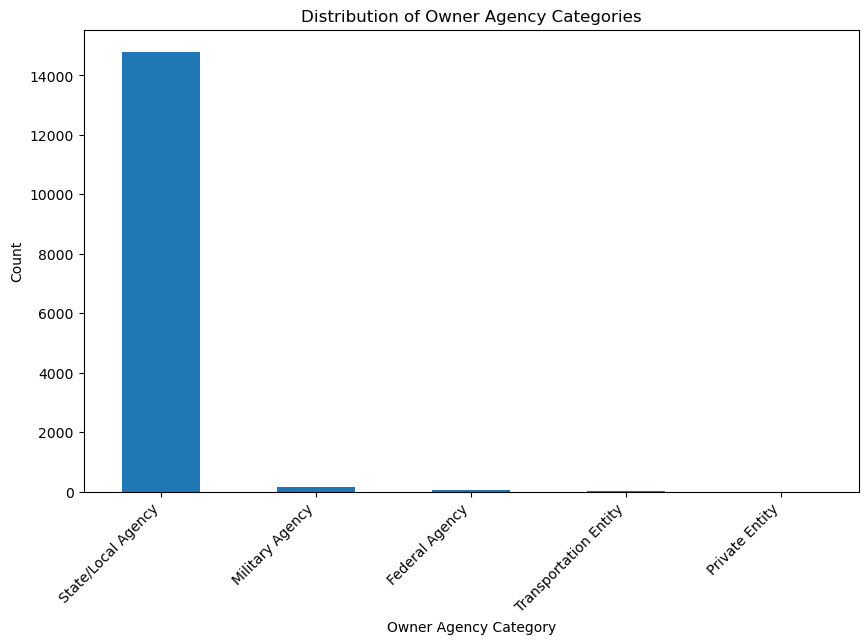

In [102]:
plt.figure(figsize=(10, 6))
owner_agency_counts.plot(kind='bar')
plt.title('Distribution of Owner Agency Categories')
plt.xlabel('Owner Agency Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

We can see in the above graph that "Owner Agency" doesn't particularly offer us any additional insight when we group all the individual values together in their larger respective category, as it's a near constant value for "State/Local Agency" so we can go ahead and remove this column as it holds no real predictive power.

## Cleaning Main Span Material

In [105]:
df['Main Span Material'] = df['Main Span Material'].replace({
    'Concrete': 'Concrete',
    'Prestressed Concrete': 'Concrete',
    'Concrete Continuous': 'Concrete',
    'Prestressed Concrete Continuous': 'Concrete',
    'Steel': 'Steel',
    'Steel Continuous': 'Steel',
    'Wood or Timber': 'Wood/Timber',
    'Aluminum, Wrought Iron or Cast Iron': 'Metal',
    'Masonry': 'Masonry',
    'Other Material Main Span OR No Approach or Second Span Type': 'Other'
})

df['Main Span Material'] = df['Main Span Material'].apply(lambda x: x if x in ['Concrete', 'Steel', 'Wood/Timber', 'Metal', 'Masonry'] else 'Other')

owner_agency_counts = df['Main Span Material'].value_counts()

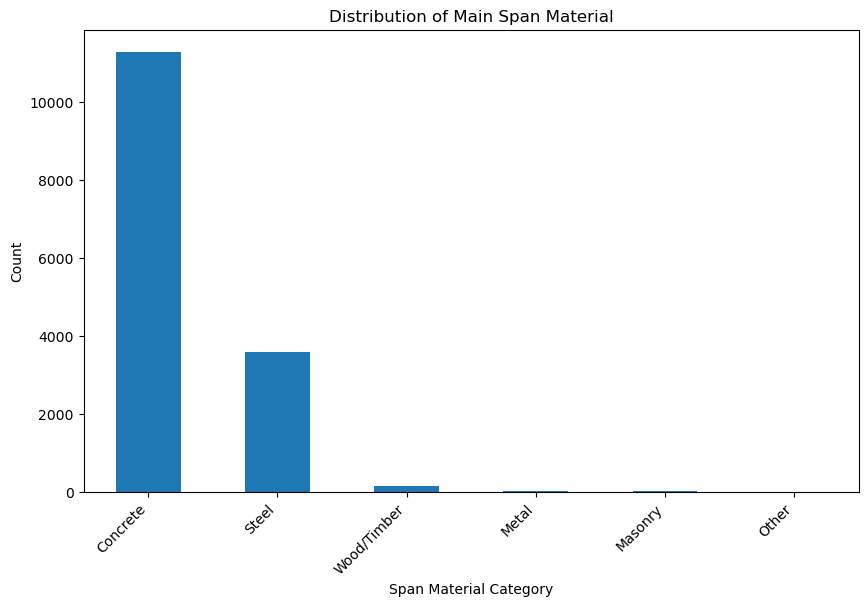

In [106]:
plt.figure(figsize=(10, 6))
owner_agency_counts.plot(kind='bar')
plt.title('Distribution of Main Span Material')
plt.xlabel('Span Material Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

We can see a high value of concrete in the material for the span but still a good number of values for steel. So we keep this value as it can offer some insight.

## Clean Span Material

In [109]:
df['Main Span Design'] = df['Main Span Design'].replace({
    'Stringer/Multi-beam or Girder': 'Girder/Beam',
    'Tee Beam': 'Girder/Beam',
    'Slab': 'Slab',
    'Channel Beam': 'Channel Beam',
    'Box Beam or Girders - Multiple': 'Box Beam/Girder',
    'Box Beam or Girders - Single or Spread': 'Box Beam/Girder',
    'Culvert': 'Culvert',
    'Arch - Deck': 'Arch',
    'Truss - Thru': 'Truss',
    'Truss - Deck': 'Truss',
    'Girder and Floorbeam System': 'Girder/Beam',
    'Frame': 'Frame',
    'Mixed Types': 'Other',
    'Movable - Bascule': 'Movable',
    'Movable - Swing': 'Movable',
    'Stayed Girder': 'Other'
})

df['Main Span Design'] = df['Main Span Design'].apply(lambda x: x if x in ['Girder/Beam', 'Slab', 'Channel Beam', 'Box Beam/Girder', 'Culvert', 'Arch', 'Truss', 'Frame', 'Movable'] else 'Other')

owner_agency_counts = df['Main Span Design'].value_counts()

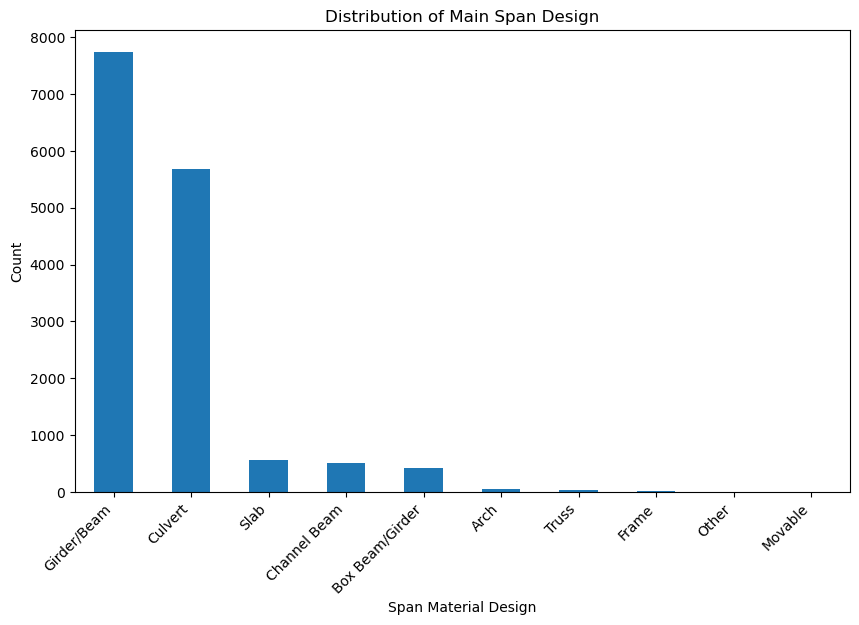

In [110]:
plt.figure(figsize=(10, 6))
owner_agency_counts.plot(kind='bar')
plt.title('Distribution of Main Span Design')
plt.xlabel('Span Material Design')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

This offers a good deal of information so we decide to keep this feature.

## Cleaning Features With 0/1/N

Since we have the reasoning ready before the cleaning started, we just go ahead and group them all together in a variable so we can process them all at once and replace the 0 and 1 based on what we think it means (again, we have no information so this is already a form of bias in our data).

In [114]:
to_change = ['Bridge Railings', 'Transitions', 'Approach Guardrail', 'Bridge Guardrail Ends']

df[to_change] = df[to_change].replace({
    '0': 'No',
    '1': 'Yes',
    'N': 'Unknown'
})

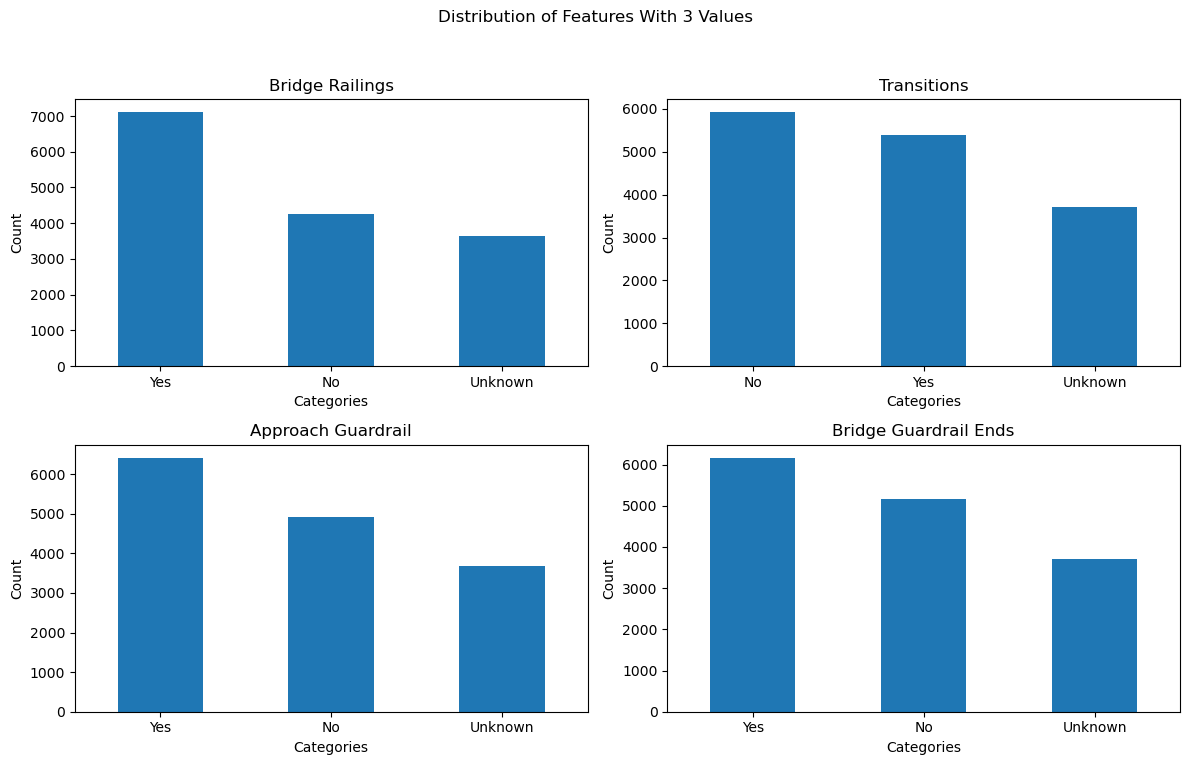

In [115]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Distribution of Features With 3 Values')

for i, col in enumerate(to_change):
    ax = axs[i // 2, i % 2]
    df[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(col)
    ax.set_xlabel('Categories')
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Cleaning Features With Appraisal And Ratings

Here, we will do the same conversion as the above method. Here we map the numbers to an actual text value for clarification and for easier reading. N and * have been converted to "unknown" as we were not sure what those values actually meant.

In [118]:
columns_to_bin = ['Deck Condition Rating', 'Superstructure Condition Rating', 'Substructure Condition Rating', 
                  'Culverts Condition Rating', 'Waterway Adequacy Appraisal', 'Deck Geometry Appraisal',
                  'Underclearance Appraisal Vertical and Horizontal', 'Structural Evaluation Appraisal',
                  'Channel and Channel Protection Condition Rating']

# mapping number to respective ratings, n and * to unknown
for col in columns_to_bin:
    df[col] = df[col].replace({
        '0': 'Poor', 'N': 'Unknown', '*': 'Unknown',
        '1': 'Poor', '2': 'Poor', '3': 'Poor', 
        '4': 'Fair', '5': 'Fair', '6': 'Fair', 
        '7': 'Good', '8': 'Good', '9': 'Good'
    })

# make sure it works
df[columns_to_bin].head()

Deck Condition Rating Superstructure Condition Rating  \
0               Unknown                         Unknown   
1               Unknown                         Unknown   
2                  Good                            Good   
3                  Good                            Good   
4                  Good                            Good   

  Substructure Condition Rating Culverts Condition Rating  \
0                       Unknown                      Good   
1                       Unknown                      Good   
2                          Fair                   Unknown   
3                          Fair                   Unknown   
4                          Good                   Unknown   

  Waterway Adequacy Appraisal Deck Geometry Appraisal  \
0                        Good                 Unknown   
1                        Good                 Unknown   
2                        Fair                    Poor   
3                        Good                    Good   
4                        Good                    Fair   

  Underclearance Appraisal Vertical and Horizontal  \
0                                          Unknown   
1                                          Unknown   
2                                          Unknown   
3                                          Unknown   
4                                          Unknown   

  Structural Evaluation Appraisal  \
0                         Unknown   
1                         Unknown   
2                            Fair   
3                            Fair   
4                            Good   

  Channel and Channel Protection Condition Rating  
0                                            Good  
1                                            Fair  
2                                            Fair  
3                                            Good  
4                                            Good

We now can visualize this to make sure everything converted correctly and getting more of an idea of if we have any feature we can drop if high value counts can be noticed.

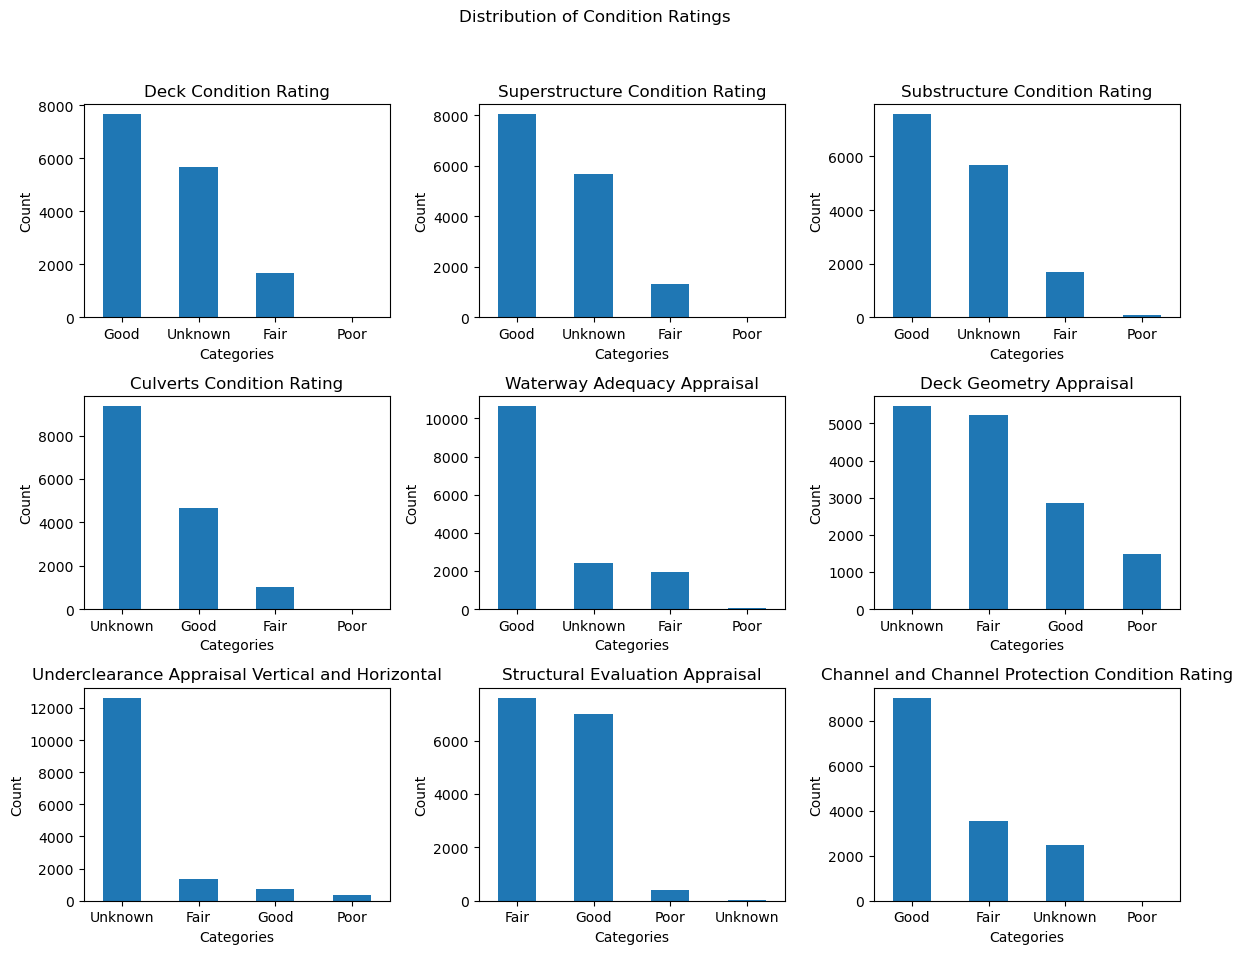

In [120]:
fig, axs = plt.subplots(3, 3, figsize=(12, 10))
fig.suptitle('Distribution of Condition Ratings')

for i, col in enumerate(columns_to_bin):
    ax = axs[i // 3, i % 3]
    df[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(col)
    ax.set_xlabel('Categories')
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In this one, we can see that the 'Underclearance Appraisal Vertical and Horizontal' mostly has values as 'Not Applicable' and the other values represent a smaller number compared to 'Unknown'. As this would offer no real insight so we chose to add it to the list of features to drop.

## Cleaning the Scour Critical Bridge Value

In [123]:
scour_mapping = {
    'Bridge foundations determined to be stable for the assessed or calculated scour condition. Scour is determined to be above top of footing (Example A) by assessment (i.e., bridge foundations are on rock formations that have been determined to resist scour within the service life of the bridge4), by calculation or by installation of properly designed countermeasures (see HEC 23).': 'Stable',
    'Bridge foundations determined to be stable for assessed or calculated scour condition. Scour is determined to be within the limits of footing or piles (Example B) by assessment (i.e.,bridge foundations are on rock formations that have been determined to resist scour within the service life of the bridge), by calculations or by installation of properly designed countermeasures (see HEC 23).': 'Stable',
    'Bridge with "unknown" foundation that has not been evaluated for scour. Until risk can be determined, a plan of action should be developed and implemented to reduce the risk to users from abridge failure during and immediately after a flood event (see HEC 23).': 'Unknown',
    'Scour calculation/evaluation has not been made. (Use only to describe case WHERE bridge has not yet been evaluated for scour potential.)': 'Unknown',
    'Bridge not over waterway': 'Not Over Water',
    'Bridge is scour critical; bridge foundations determined to be unstable for assessed or calculated scour conditions:- Scour within limits of footing or piles. (Example B)- Scour below spread-footing base or pile tips. (Example C)': 'Scour Critical',
    'Bridge is scour critical; field review indicates that extensive scour has occurred at bridge foundations, which are determined to be unstable by:- a comparison of calculated scour and observed scour during the bridge inspection, or - an engineering evaluation of the observed scour condition reported by the bridge inspector in Item 60.': 'Scour Critical',
    'Bridge foundations determined to be stable for assessed or calculated scour conditions; field review indicates action is required to protect exposed foundations (see HEC 23).': 'Stable',
    'Countermeasures have been installed to mitigate an existing problem with scour and to reduce the risk of bridge failure during a flood event. Instructions contained in a plan of action have been implemented to reduce the risk to users from a bridge failure during or immediately after a flood event.': 'Countermeasures Taken',
    'Bridge foundations (including piles) on dry land well above flood water elevations.': 'Not Over Water'
}

df['Scour Critical Bridge Value'] = df['Scour Critical Bridge Value'].map(scour_mapping)

scour_counts = df['Scour Critical Bridge Value'].value_counts()

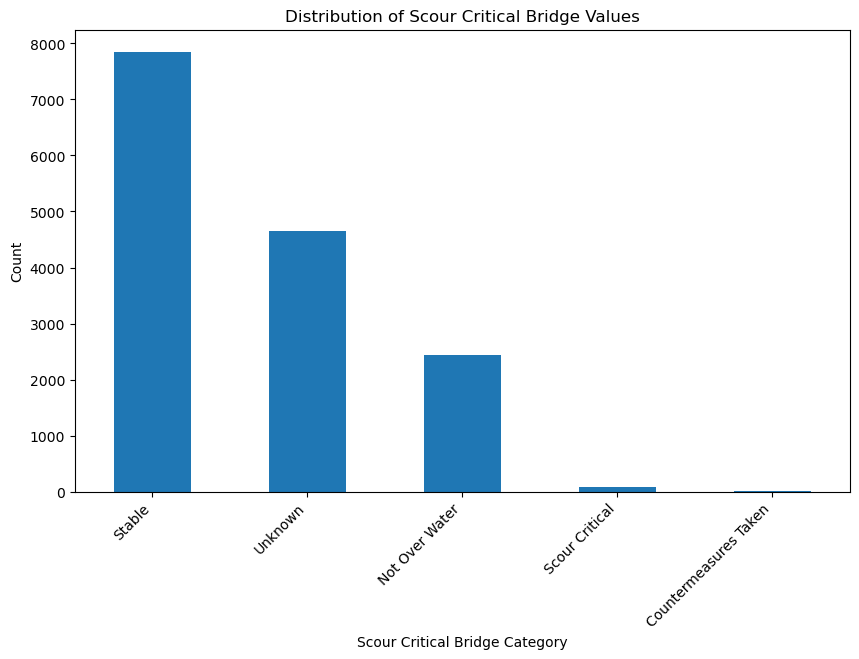

In [124]:
plt.figure(figsize=(10, 6))
scour_counts.plot(kind='bar')
plt.title('Distribution of Scour Critical Bridge Values')
plt.xlabel('Scour Critical Bridge Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

## Grouping The Date By Year

We deciced to group the date by year instead as this would reduce data while nevertheless retaining information about the date.

We first start by getting the date and the right date format. 

The next step is to take the two digits for years and actually change it to full year dates, so for example 04 would become 2004 (we assumed here that most of the dates were in the 2000s).

We change the column name to avoid confusion, so instead of 'Inspection Date', we changed it to 'Inspection Year' for more clarification.

We then get the counts to display on the chart

In [128]:
# getting the format to target the year correctly
df['Inspection Date'] = df['Inspection Date'].str.extract(r'(\d{2})(?=\s0:00$)')

# convert the year digit to full year
df['Inspection Date'] = df['Inspection Date'].apply(lambda x: '20' + x if int(x) >= 10 else '20' + x).astype(object)

# rename
df.rename(columns={'Inspection Date': 'Inspection Year'}, inplace=True)

year_counts = df['Inspection Year'].value_counts().sort_index()

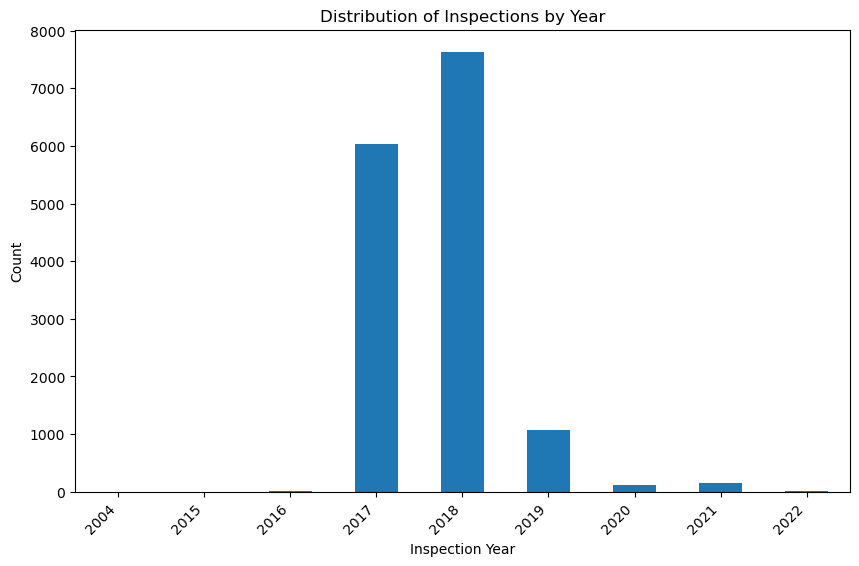

In [129]:
plt.figure(figsize=(10, 6))
year_counts.plot(kind='bar')
plt.title('Distribution of Inspections by Year')
plt.xlabel('Inspection Year')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

## Cleaning Districts

### Cleaning the State Senate District Groups

In this section we proceed by cleaning all of the districts one by one and group them into groups of districts.

We do this by getting the number of the district at the end of the data. 

We then bin them in their correct bins based on the end number

We also handle when the values are unknown and create an unknown bin as well.

In [133]:
df['State Senate District Number'] = df['State Senate District'].str.extract(r'(\d+)').astype(float)

# binning and applying the bin grouping
bins = [0, 10, 20, 40, 60]
labels = ['0-9', '10-19', '20-39', '40-60']

df['State Senate District Number'] = pd.cut(df['State Senate District Number'], bins=bins, labels=labels, include_lowest=True)

# converting the disctricts to allow binning 'unknown' into their own bin
df['State Senate District Number'] = df['State Senate District Number'].astype(str)
df['State Senate District Number'].replace('nan','Unknown', inplace=True)

In [134]:
# we just make sure that everything works accordingly
state_disctrict_count = df['State Senate District Number'].value_counts().sort_index()
state_disctrict_count

State Senate District Number
0-9        2713
10-19      4198
20-39      4626
40-60      3453
Unknown      44
Name: count, dtype: int64

Now that we know everything works correctly, we go ahead and visualise it to see if the data can have some predictive power.

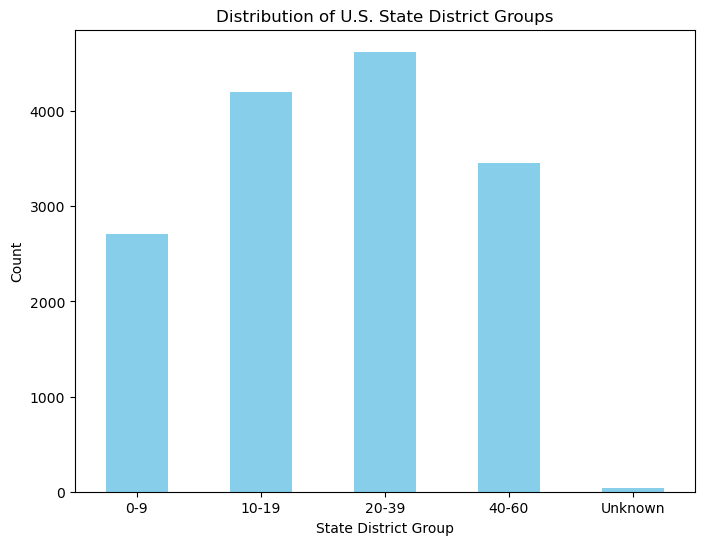

In [136]:
plt.figure(figsize=(8, 6))
state_disctrict_count.plot(kind='bar', color='skyblue')
plt.title('Distribution of U.S. State District Groups')
plt.xlabel('State District Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

It looks as the data is quite nicely distributed with enough data a bit everywhere. We decide to keep this feature for prediction.

### Cleaning the US Congressional District Groups

We follow the same logic here as the State District above. well.

In [140]:
df['Congressional District Number'] = df['U.S. Congressional District'].str.extract(r'(\d+)').astype(float)

# binning and applying te bin grouping
bins = [0, 5, 10, 15]
labels = ['0-5', '5-10', '10-15']

df['Congressional District Number'] = pd.cut(df['Congressional District Number'], bins=bins, labels=labels, include_lowest=True)

# converting the disctrics to allow binning 'unknown' into their own bin
df['Congressional District Number'] = df['Congressional District Number'].astype(str)
df['Congressional District Number'] = df['Congressional District Number'].replace('nan','Unknown')

In [141]:
# making sure everything works here too
congress_counts = df['Congressional District Number'].value_counts().sort_index()
congress_counts

Congressional District Number
0-5        5335
10-15      4028
5-10       5627
Unknown      44
Name: count, dtype: int64

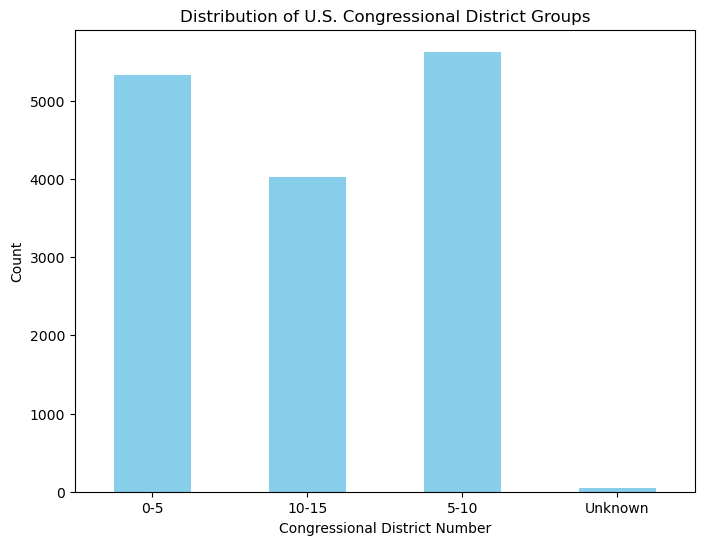

In [142]:
plt.figure(figsize=(8, 6))
congress_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of U.S. Congressional District Groups')
plt.xlabel('Congressional District Number')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

## Checking Value Counts For Verification

We print out the value counts one more time to make sure that everything converted correctly and that we are ready to proceed with dropping unecessary values and move on to Feature Engineering

In [145]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
for col in categorical_columns:
    print(df[col].value_counts())
    print("\n" + "-"*50 + "\n")

Owner Agency
State/Local Agency       14796
Military Agency            144
Federal Agency              57
Transportation Entity       34
Private Entity               3
Name: count, dtype: int64

--------------------------------------------------

Main Span Material
Concrete       11281
Steel           3583
Wood/Timber      152
Metal              9
Masonry            6
Other              3
Name: count, dtype: int64

--------------------------------------------------

Main Span Design
Girder/Beam        7736
Culvert            5677
Slab                569
Channel Beam        518
Box Beam/Girder     417
Arch                 48
Truss                40
Frame                19
Other                 6
Movable               4
Name: count, dtype: int64

--------------------------------------------------

Bridge Condition
Good    11239
Fair     3502
Poor      293
Name: count, dtype: int64

--------------------------------------------------

Inspection Year
2018    7635
2017    6030
2019    1079


In [146]:
df.shape

(15034, 57)

## Reviewing Features To Drop

- **State Senate District** : We created a new column with the numbers grouped
- **U.S. Congressional District** : We created a new column with the numbers grouped
- **Minimum Lateral Underclearance Reference Feature** : No real insight on the meaning of the letters and mostly N
- **Minimum Vertical Underclearance Reference Feature** : No real insight on the meaning of the letters, and mostly N
- **Design Load Descriptor** : Unsure of what the values mean and how to interpret
- **Other Special Inspection** : near constant value of N
- **Underwater Inspection** : Not sure what values represent Y60 and mostly N values
- **Fracture Critical Details** : Mostly N values here too
- **Underclearance Appraisal Vertical and Horizontal** : Mostly N values and other very low values, offers no real insight
- **Owner Agency** : Offers no real insight since most of the values are leaned towards State Agency

In [149]:
final_drop = ['State Senate District','U.S. Congressional District','Minimum Lateral Underclearance Reference Feature',
              'Minimum Vertical Underclearance Reference Feature','Design Load Descriptor','Other Special Inspection',
              'Underwater Inspection','Fracture Critical Details','Underclearance Appraisal Vertical and Horizontal', 'Owner Agency']

df = df.drop(final_drop, axis=1)

In [150]:
df.shape

(15034, 47)

# Feature Engineering for Numerical and Catagorical Columns

In [152]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans

We create pipelines to encode, scale, and impute missing values for our catagorical and numerical columns.

In [154]:
# List of all numerical columns
num_columns = df.select_dtypes(include=['int64','float64']).columns

# Names of all the columns that will get label encoded
intended_cat_columns_label = [
    'Deck Condition Rating', 'Superstructure Condition Rating', 'Substructure Condition Rating',
    'Culverts Condition Rating', 'Waterway Adequacy Appraisal', 'Deck Geometry Appraisal',
    'Underclearance Appraisal Vertical and Horizontal', 'Structural Evaluation Appraisal',
    'Channel and Channel Protection Condition Rating', 'Bridge Condition'
]
# Columns we don't need
non_encodable_columns = ['Bridge Railings','Transitions', 'Approach Guardrail', 'Bridge Guardrail Ends']

# List of all the columns that will get label encoded
cat_columns_label = df.columns.intersection(intended_cat_columns_label).tolist()

# List of all the columns that will get oneHotEncoded
cat_columns_ohe = [col for col in df.columns if col not in num_columns and col not in cat_columns_label and col not in non_encodable_columns]

# We create a pipeline for ohe columns, with a simple imputer to impute missing values with the strategy of most frequent
# Then we encode using OHE encoder
# The encoder ignores any new or "unknown" categories it encounters during transformation that were not present during fit
cat_pipeline_ohe = make_pipeline(
    SimpleImputer(strategy = "most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)

# We create a pipeline for label columns, with a simple imputer to impute missing values with the strategy of most frequent
# We use an ordinal encoder inorder to label encode our data that are intended for label encoding
cat_pipeline_label = make_pipeline(
    SimpleImputer(strategy = "most_frequent"),
    OrdinalEncoder()
)

# We create a pipeline for numerical columns,
# using a SimpleImputer to impute missing values with median for imputation as it's more robust to outliers than mean
num_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    MinMaxScaler()
)

We apply our pipeline strategies here using a ColumnTransformer because it allows us to apply different preprocessing steps to different sets of columns within the dataset.
This configuration allows for flexible, column-specific transformations within a single, unified preprocessing step.

In [156]:
# ColumnTransformer to apply different preprocessing pipelines:
# - num: numerical columns use num_pipeline for imputation and scaling
# - cat_ohe: categorical columns use cat_pipeline_ohe for one-hot encoding
# - cat_label: categorical columns use cat_pipeline_label for label encoding
preprocessing = ColumnTransformer(
    transformers=[
        ("num", num_pipeline, num_columns),
        ("cat_ohe", cat_pipeline_ohe, cat_columns_ohe),
        ("cat_label", cat_pipeline_label, cat_columns_label)
    ]
)

These are steps that were taken by us to transform the data using our preprocessing pipeline, ensure it is in a dense format, and assign meaningful column names for the transformed DataFrame:

1. **Transform and Ensure Dense Format**:
   - The data is transformed using the preprocessing pipeline (`preprocessing.fit_transform(df)`).
   - If the output is already a dense array (`NumPy ndarray`), we use it as-is. If the output is sparse, we convert it to a dense format (`toarray()`), which is easier to work with in a DataFrame.

2. **Extract Feature Names**:
   - **Numeric Feature Names**: Extracted directly from the list of numerical columns (`num_columns`).
   - **Categorical Feature Names (One-Hot Encoded)**: Derived by combining the column name with each category value, creating names like `"column_value"` for clarity.
   - **Categorical Feature Names (Label Encoded)**: Retained as the original column names.

3. **Combine and Assign Feature Names**:
   - All feature names (numeric, one-hot encoded, and label encoded) are combined into a single list (`all_feature_names`).
   - A DataFrame is then created with these feature names, allowing for clear interpretation of each column.

Finally, the head of the preprocessed DataFrame is printed to verify the transformation.

In [158]:
# Transform the data using the preprocessing pipeline and ensure it is dense
df_transformed = preprocessing.fit_transform(df)

# If the transformation output is already a dense array (NumPy ndarray), use it directly;
# otherwise, convert the sparse matrix to a dense array format for further processing.
if isinstance(df_transformed, np.ndarray):
    transformed_array = df_transformed
else:
    transformed_array = df_transformed.toarray()

# Extract feature names for numeric and categorical columns:
# Numeric feature names are directly from num_columns
num_feature_names = num_columns.tolist()

# Categorical feature names (one-hot encoded) are derived from the categories in each column.
# We create names like 'col'_'val' to clearly indicate each category
ohe = preprocessing.named_transformers_['cat_ohe'].named_steps['onehotencoder']
cat_feature_names_ohe = [f"{col}_{val}" for col, vals in zip(cat_columns_ohe, ohe.categories_) for val in vals]
cat_feature_names_label = cat_columns_label

# Combine all feature names for final DataFrame
all_feature_names = num_feature_names + cat_feature_names_ohe + cat_feature_names_label

# Create the DataFrame with the correct columns
df_preprocessed = pd.DataFrame(transformed_array, columns=all_feature_names)
print(df_preprocessed.head())

   Average Daily Traffic  Number of Spans in Main Unit  \
0               0.000298                      0.009615   
1               0.000149                      0.009615   
2               0.000316                      0.009615   
3               0.027714                      0.028846   
4               0.001462                      0.038462   

   Structure Length (ft.)  Bridge Age (yr)  Deck Area (sq. ft.)  \
0                0.000521         0.066667             0.000178   
1                0.000521         0.080000             0.000245   
2                0.004869         0.213333             0.001032   
3                0.010292         0.400000             0.011962   
4                0.011334         0.313333             0.004209   

   Mile Point (miles)  Latitude (decimal)  Longitude (decimal)  \
0            0.003530            0.993535             0.023392   
1            0.005321            0.998106             0.034642   
2            0.005777            0.998682         

In [159]:
# We make sure all data has been imputed
df_preprocessed.isnull().sum() /len(df_preprocessed) * 100

Average Daily Traffic                              0.0
Number of Spans in Main Unit                       0.0
Structure Length (ft.)                             0.0
Bridge Age (yr)                                    0.0
Deck Area (sq. ft.)                                0.0
                                                  ... 
Channel and Channel Protection Condition Rating    0.0
Culverts Condition Rating                          0.0
Structural Evaluation Appraisal                    0.0
Deck Geometry Appraisal                            0.0
Waterway Adequacy Appraisal                        0.0
Length: 76, dtype: float64

In [160]:
# Initialize KMeans clustering with:
# - 3 clusters
# - a fixed random state for reproducibility
# - n_init=50 to run the algorithm 50 times with different centroid seeds and choose the best result
model = KMeans(n_clusters = 3, random_state=101,n_init=50)

In [161]:
cluster_labels = model.fit_predict(df_preprocessed)

In [162]:
df_preprocessed['cluster_column'] = cluster_labels

In [163]:
df_preprocessed

Average Daily Traffic  Number of Spans in Main Unit  \
0                   0.000298                      0.009615   
1                   0.000149                      0.009615   
2                   0.000316                      0.009615   
3                   0.027714                      0.028846   
4                   0.001462                      0.038462   
...                      ...                           ...   
15029               0.036843                      0.048077   
15030               0.001462                      0.028846   
15031               0.001462                      0.019231   
15032               0.001372                      0.028846   
15033               0.000597                      0.009615   

       Structure Length (ft.)  Bridge Age (yr)  Deck Area (sq. ft.)  \
0                    0.000521         0.066667             0.000178   
1                    0.000521         0.080000             0.000245   
2                    0.004869         0.213333             0.001032   
3                    0.010292         0.400000             0.011962   
4                    0.011334         0.313333             0.004209   
...                       ...              ...                  ...   
15029                0.002604         0.020000             0.001055   
15030                0.001823         0.006667             0.000532   
15031                0.000555         0.006667             0.000321   
15032                0.014708         0.013333             0.006028   
15033                0.007575         0.013333             0.003340   

       Mile Point (miles)  Latitude (decimal)  Longitude (decimal)  \
0                0.003530            0.993535             0.023392   
1                0.005321            0.998106             0.034642   
2                0.005777            0.998682             0.030671   
3                0.095775            0.914914             0.071586   
4                0.002817            0.914571             0.071343   
...                   ...                 ...                  ...   
15029            0.013803            0.984375             0.008876   
15030            0.002817            0.986828             0.008616   
15031            0.002817            0.988308             0.008203   
15032            0.000282            0.996073             0.007366   
15033            0.008451            0.986353             0.002043   

       Maintenance Responsibility  Approach Roadway Width (ft.)  ...  \
0                        0.863014                      0.029863  ...   
1                        0.863014                      0.037744  ...   
2                        0.863014                      0.029863  ...   
3                        0.000000                      0.244712  ...   
4                        0.013699                      0.054334  ...   
...                           ...                           ...  ...   
15029                    0.000000                      0.062630  ...   
15030                    0.013699                      0.037744  ...   
15031                    0.013699                      0.046039  ...   
15032                    0.013699                      0.050187  ...   
15033                    0.013699                      0.066363  ...   

       Bridge Condition  Deck Condition Rating  \
0                   1.0                    3.0   
1                   1.0                    3.0   
2                   0.0                    1.0   
3                   0.0                    1.0   
4                   1.0                    1.0   
...                 ...                    ...   
15029               1.0                    3.0   
15030               1.0                    3.0   
15031               1.0                    3.0   
15032               1.0                    1.0   
15033               1.0                    1.0   

       Superstructure Condition Rating  Substructure Condition Rating  \
0                            

<Axes: >

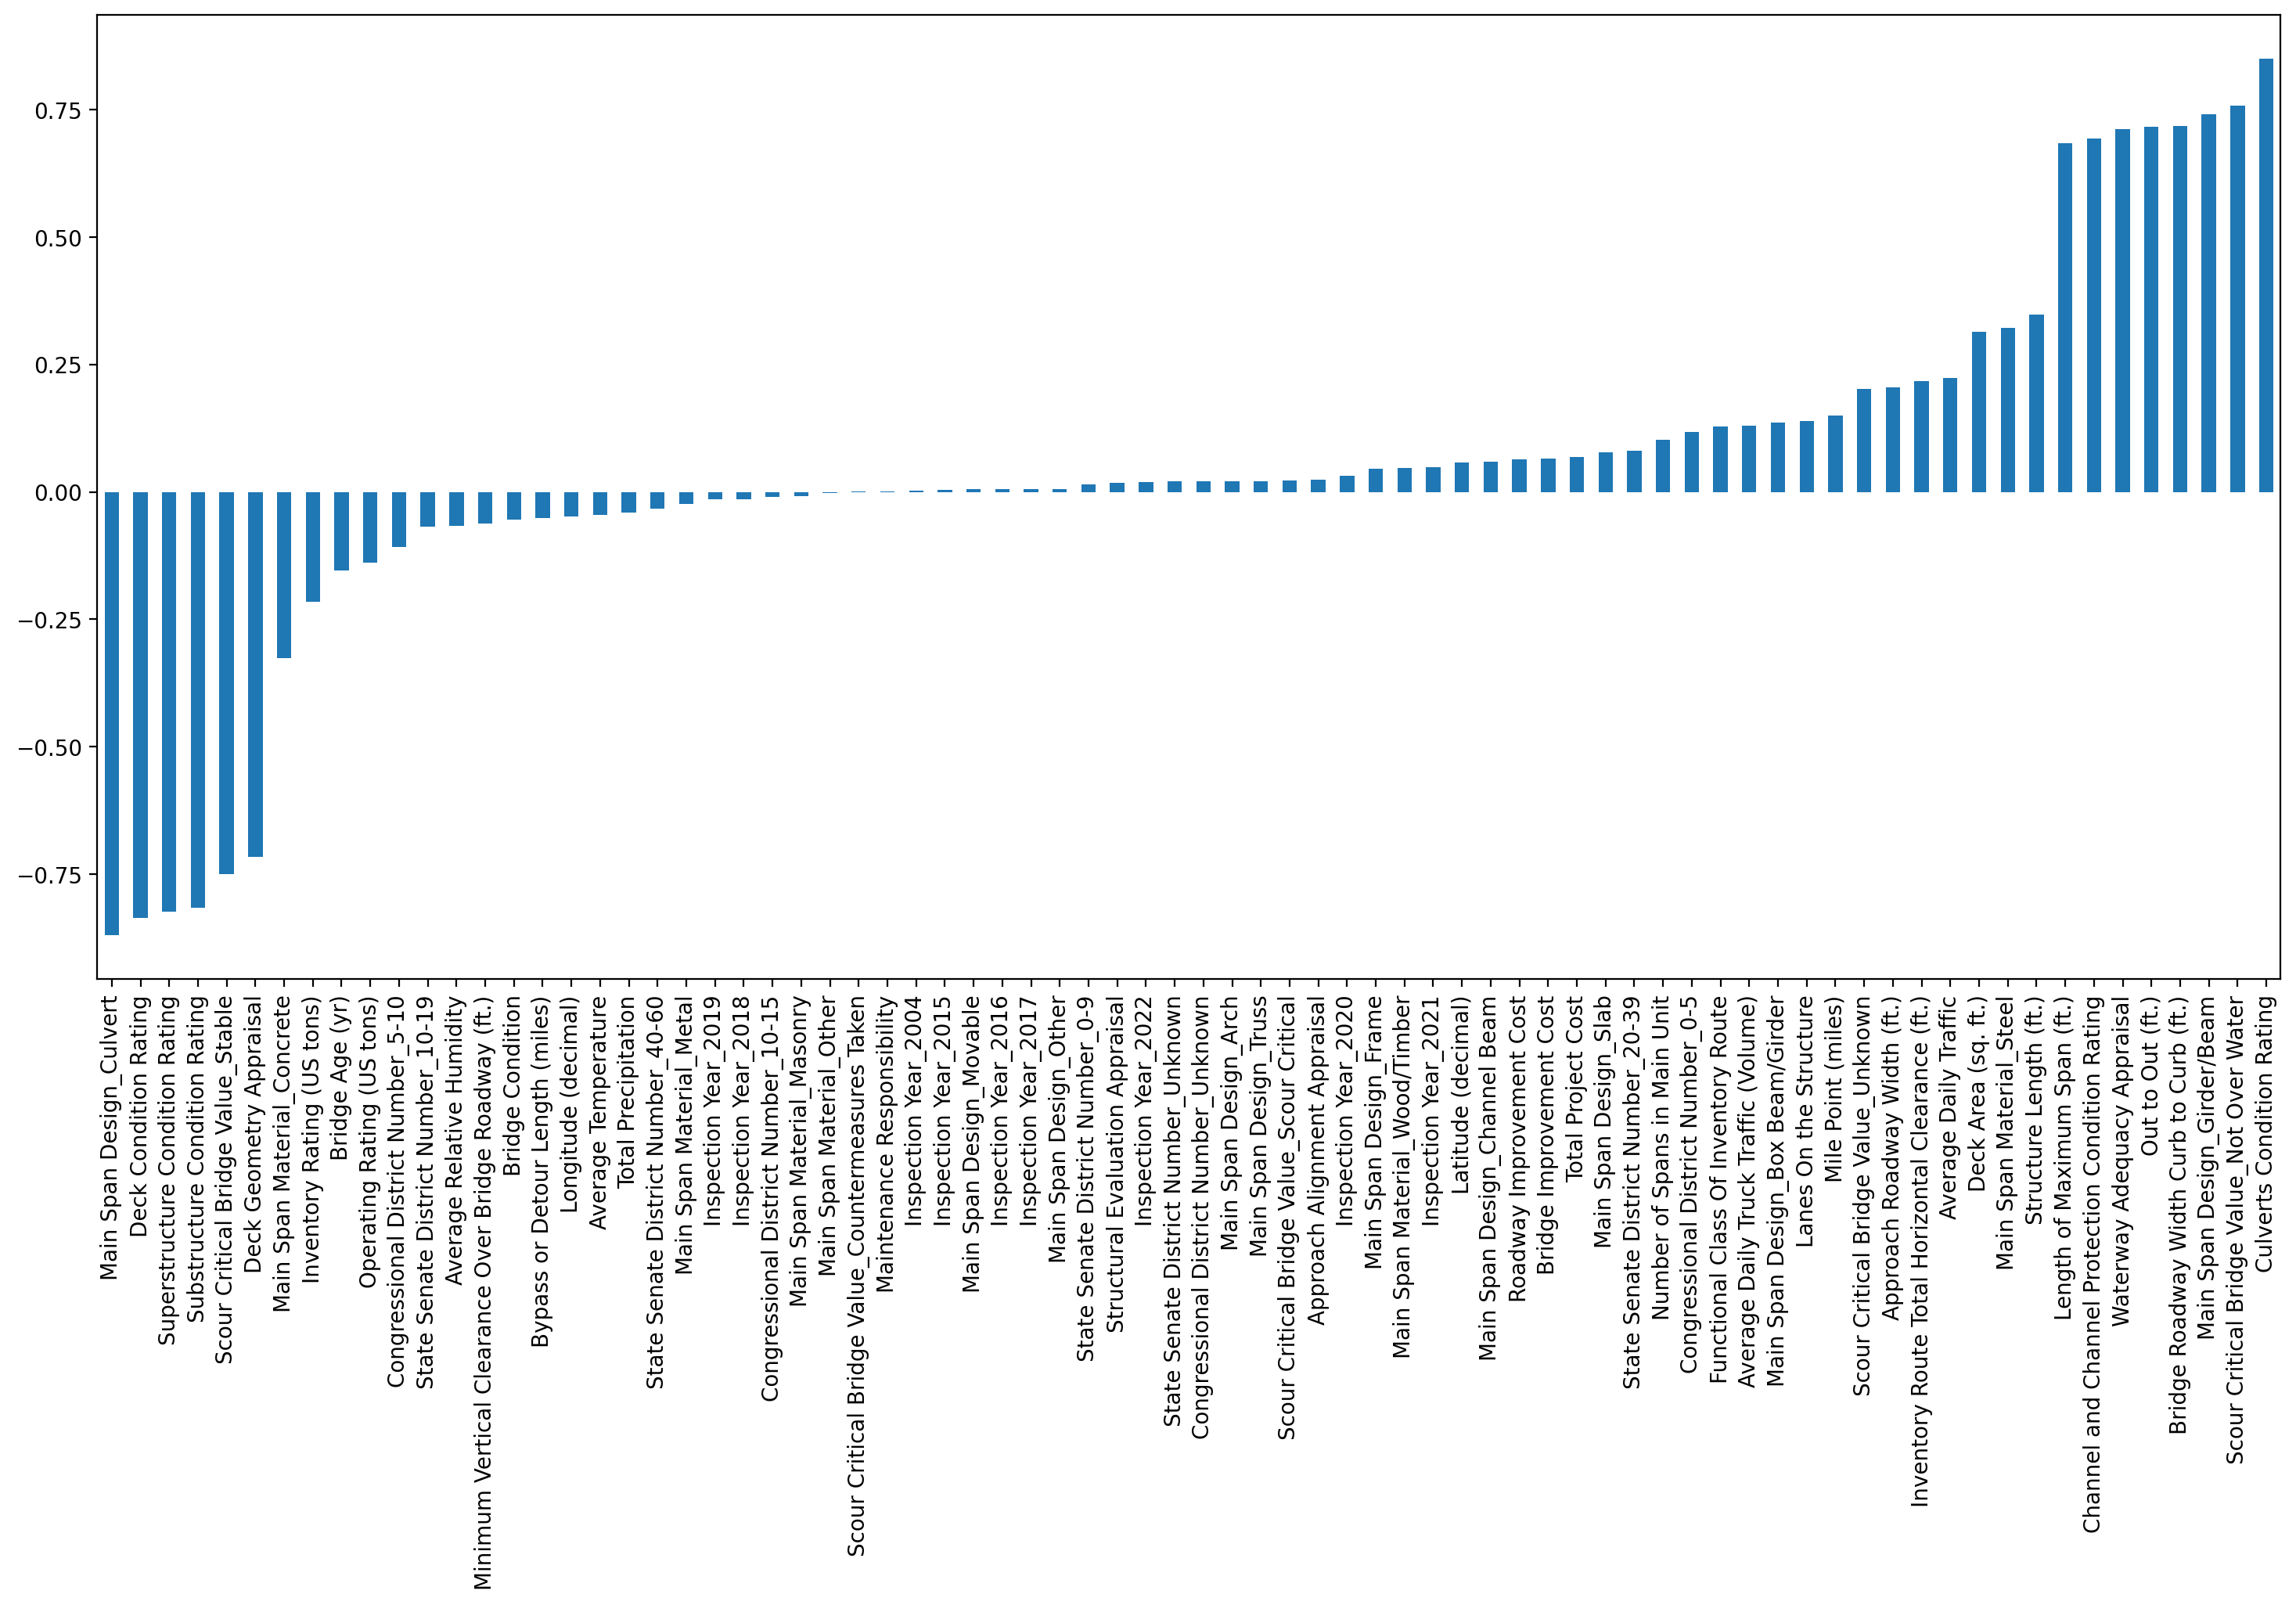

In [164]:
# We set up the figure size and resolution, then plot the sorted correlation of features with 'cluster_column'
plt.figure(figsize=(18,8),dpi=200)
df_preprocessed.corr()['cluster_column'].iloc[:-1].sort_values().plot(kind='bar')

# Regression Model

We prepare our dataset for training a regression model to predict "Total Project Cost." We follow several steps to scale the data, split it into training and testing sets, and ensure data is in the correct format for our model.

In [167]:
# We save feature names before scaling in order to retain information
feature_names = df_preprocessed.drop('Total Project Cost', axis=1).columns.tolist()

In [168]:
scaler = MinMaxScaler()

In [169]:
X = df_preprocessed.drop('Total Project Cost',axis=1)
y = df_preprocessed['Total Project Cost']

# Split the data into training (70%) and testing (30%) sets for model evaluation, using a fixed random state
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [170]:
scaler.fit(X_train)

MinMaxScaler()

In [171]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [172]:
# Convert scaled data back to DataFrames
X_train_scaled = pd.DataFrame(X_train, columns=feature_names)
X_test_scaled = pd.DataFrame(X_test, columns=feature_names)

### Random Forest Regressor

In [174]:
# Inisialize a random forest regressor with a random state of 42 to maintain reproducibility
model_random_forest = RandomForestRegressor(random_state=42)
model_random_forest.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [175]:
y_pred_random_forest = model_random_forest.predict(X_test)

In [176]:
# Get feature importances
importances_for_random_forest = model_random_forest.feature_importances_

# Rank the features
feature_importance_random_forest = pd.Series(importances_for_random_forest, index=feature_names).sort_values(ascending=False)

# Display the top 10 important features
top_10_random_forest = feature_importance_random_forest.index[:10].tolist()
print("Top 10 Important Features For Random Forest Regressor:")
print(feature_importance_random_forest.head(10))

Top 10 Important Features For Random Forest Regressor:
Bridge Improvement Cost            0.662281
Roadway Improvement Cost           0.084292
Structure Length (ft.)             0.080746
Deck Area (sq. ft.)                0.029266
Bypass or Detour Length (miles)    0.019745
Average Relative Humidity          0.012566
Mile Point (miles)                 0.011344
Length of Maximum Span (ft.)       0.010375
Inventory Rating (US tons)         0.010172
Operating Rating (US tons)         0.009481
dtype: float64


In [177]:
X_train_random_forest = X_train_scaled[top_10_random_forest]
X_test_random_forest = X_test_scaled[top_10_random_forest]

In [178]:
# We fit the model for the top 10 features in feature importance for the Random Forest
model_random_forest.fit(X_train_random_forest, y_train)
predictions_rf = model_random_forest.predict(X_test_random_forest)

In [179]:
mae_rf = mean_absolute_error(y_test, predictions_rf)

mse_rf = mean_squared_error(y_test, predictions_rf)

r2_rf = r2_score(y_test, predictions_rf)

In [180]:
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"R² Score: {r2_rf}")

Mean Absolute Error (MAE): 0.000752534248433163
Mean Squared Error (MSE): 0.00024151116362472523
R² Score: 0.7681606759833898


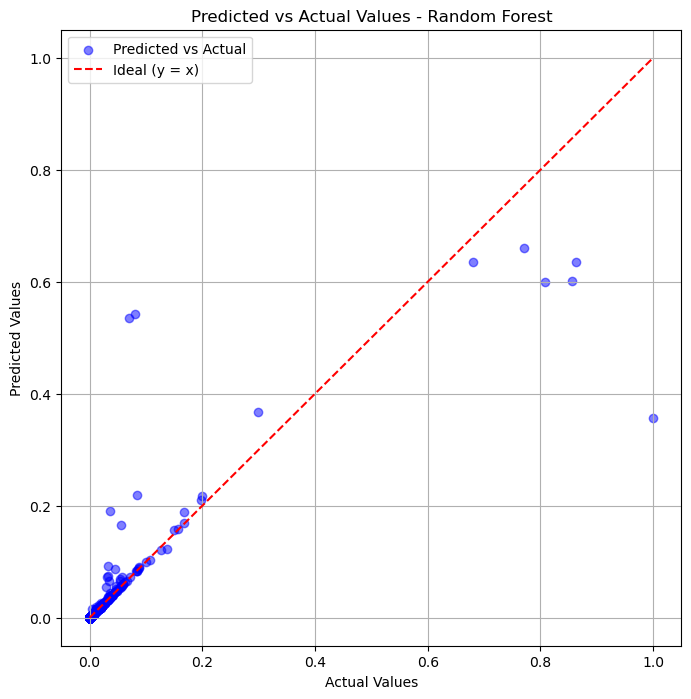

In [365]:
plt.figure(figsize=(8, 8))

# Scatter plot of actual vs predicted values
plt.scatter(y_test, predictions_rf, color='blue', alpha=0.5, label='Predicted vs Actual')

# Add the line of identity (y = x)
min_val = min(min(y_test), min(predictions_rf))
max_val = max(max(y_test), max(predictions_rf))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Ideal (y = x)')

# Labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values - Random Forest')
plt.legend()
plt.grid(True)
plt.show()


- Most of the points are clustered near the bottom-left corner, suggesting the model predicts well for smaller values.

- Some points deviate more as the values increase, indicating that the model may have some difficulty predicting larger values accurately.

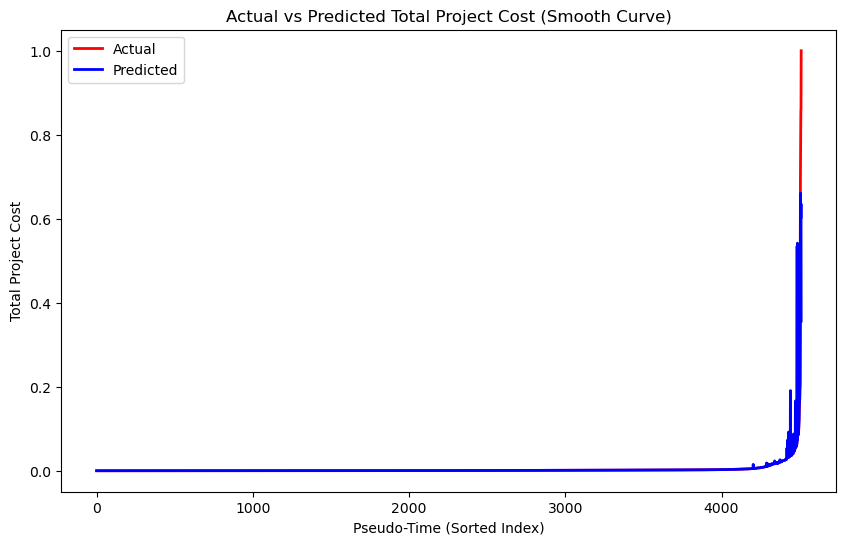

In [351]:
import numpy as np
import matplotlib.pyplot as plt

# Sort the actual values and predictions by the actual values to create a smooth curve
sorted_indices = np.argsort(y_test)  # Sort by actual values
y_test_sorted = np.array(y_test)[sorted_indices]
predictions_sorted = np.array(predictions_rf)[sorted_indices]

plt.figure(figsize=(10, 6))

# Plot sorted actual values in red
plt.plot(y_test_sorted, label='Actual', color='red', linewidth=2)

# Plot sorted predicted values in blue
plt.plot(predictions_sorted, label='Predicted', color='blue', linewidth=2)

# Adding labels and title
plt.xlabel('Pseudo-Time (Sorted Index)')
plt.ylabel('Total Project Cost')
plt.title('Actual vs Predicted Total Project Cost (Smooth Curve)')
plt.legend()
plt.show()

### Decision Tree Regressor

In [183]:
# Set a random state for reproducibility
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [184]:
y_pred_decision_tree = model_dt.predict(X_test)

In [185]:
# Get feature importances
importances_for_decision_tree = model_dt.feature_importances_

# Rank the features
feature_importance_decision_tree = pd.Series(importances_for_decision_tree, index=feature_names).sort_values(ascending=False)

# Display the top 10 features
top_10_decision_tree = feature_importance_decision_tree.index[:10].tolist()
print("Top 10 Important Features For Decision Tree Regressor:")
print(feature_importance_decision_tree.head(10))

Top 10 Important Features For Decision Tree Regressor:
Bridge Improvement Cost                             0.693687
Number of Spans in Main Unit                        0.109326
Roadway Improvement Cost                            0.045351
Latitude (decimal)                                  0.045334
Average Relative Humidity                           0.034277
Inventory Route Total Horizontal Clearance (ft.)    0.027622
Structure Length (ft.)                              0.022615
Out to Out (ft.)                                    0.012216
Deck Area (sq. ft.)                                 0.008473
Congressional District Number_5-10                  0.000386
dtype: float64


In [186]:
X_train_decision_tree = X_train_scaled[top_10_decision_tree]
X_test_decision_tree = X_test_scaled[top_10_decision_tree]

In [187]:
# We fit the model for the top 10 features in feature importance for the Decision Tree
model_dt.fit(X_train_decision_tree, y_train)
predictions_dt = model_dt.predict(X_test_decision_tree)

In [188]:
mae_dt = mean_absolute_error(y_test, predictions_dt)

mse_dt = mean_squared_error(y_test, predictions_dt)

r2_dt = r2_score(y_test, predictions_dt)

In [189]:
print(f"Mean Absolute Error (MAE): {mae_dt}")
print(f"Mean Squared Error (MSE): {mse_dt}")
print(f"R² Score: {r2_dt}")

Mean Absolute Error (MAE): 0.00044208955758501343
Mean Squared Error (MSE): 0.0001978594304918841
R² Score: 0.8100642805612581


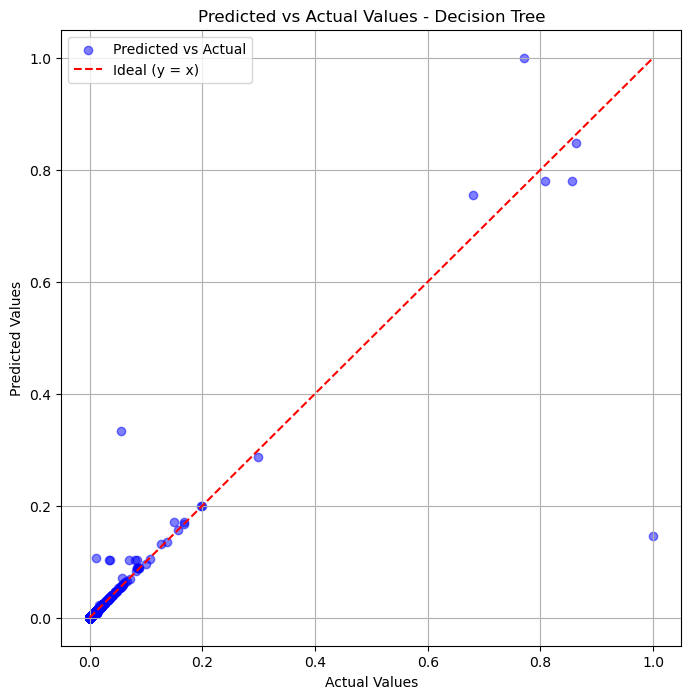

In [363]:
plt.figure(figsize=(8, 8))

# Scatter plot of actual vs predicted values
plt.scatter(y_test, predictions_dt, color='blue', alpha=0.5, label='Predicted vs Actual')

# Add the line of identity (y = x)
min_val = min(min(y_test), min(predictions_dt))
max_val = max(max(y_test), max(predictions_dt))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Ideal (y = x)')

# Labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values - Decision Tree')
plt.legend()
plt.grid(True)
plt.show()


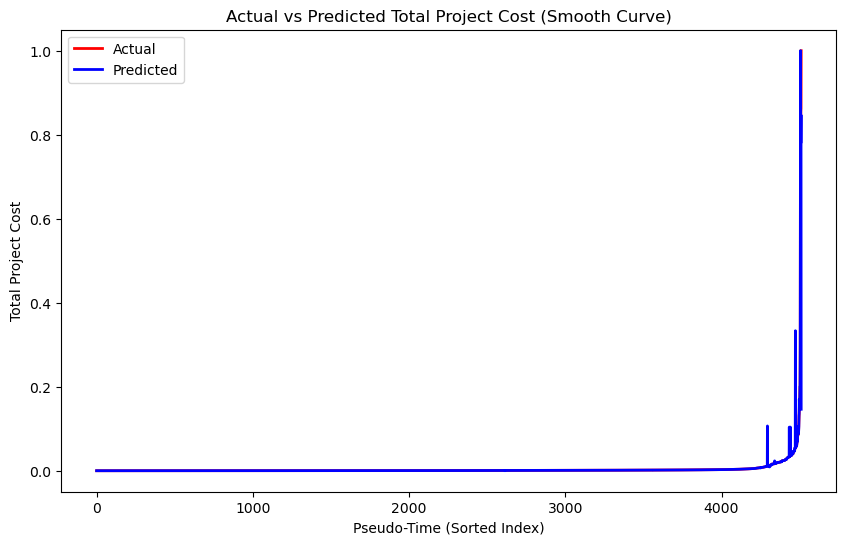

In [357]:
# Sort the actual values and predictions by the actual values to create a smooth curve
sorted_indices = np.argsort(y_test)  # Sort by actual values
y_test_sorted = np.array(y_test)[sorted_indices]
predictions_sorted = np.array(predictions_dt)[sorted_indices]

plt.figure(figsize=(10, 6))

# Plot sorted actual values in red
plt.plot(y_test_sorted, label='Actual', color='red', linewidth=2)

# Plot sorted predicted values in blue
plt.plot(predictions_sorted, label='Predicted', color='blue', linewidth=2)

# Adding labels and title
plt.xlabel('Pseudo-Time (Sorted Index)')
plt.ylabel('Total Project Cost')
plt.title('Actual vs Predicted Total Project Cost (Smooth Curve)')
plt.legend()
plt.show()

### KNN Regressor

For Knn Regressor it does not have the feature importance parameters therefore we train it on the whole dataset

In [192]:
# Define the KNeighborsRegressor model with specified parameters:
# - n_neighbors: number of neighbors to consider (5)
# - weights: use distance-based weighting for neighbors
knn_model = KNeighborsRegressor(n_neighbors=5, weights='distance')
knn_model.fit(X_train, y_train)

KNeighborsRegressor(weights='distance')

In [193]:
predictions_knn = knn_model.predict(X_test)

In [194]:
mae_knn = mean_absolute_error(y_test, predictions_knn)

mse_knn = mean_squared_error(y_test, predictions_knn)

r2_knn = r2_score(y_test, predictions_knn)

In [195]:
print(f"Mean Absolute Error (MAE): {mae_knn}")
print(f"Mean Squared Error (MSE): {mse_knn}")
print(f"R² Score: {r2_knn}")

Mean Absolute Error (MAE): 0.002916093202229688
Mean Squared Error (MSE): 0.0007843627727425134
R² Score: 0.2470487397469462


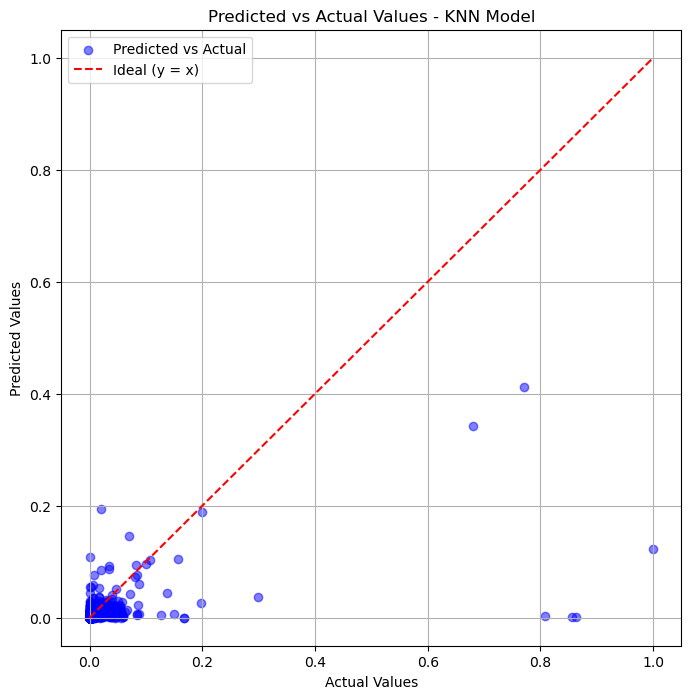

In [361]:
plt.figure(figsize=(8, 8))

# Scatter plot of actual vs predicted values
plt.scatter(y_test, predictions_knn, color='blue', alpha=0.5, label='Predicted vs Actual')

# Add the line of identity (y = x)
min_val = min(min(y_test), min(predictions_knn))
max_val = max(max(y_test), max(predictions_knn))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Ideal (y = x)')

# Labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values - KNN Model')
plt.legend()
plt.grid(True)
plt.show()


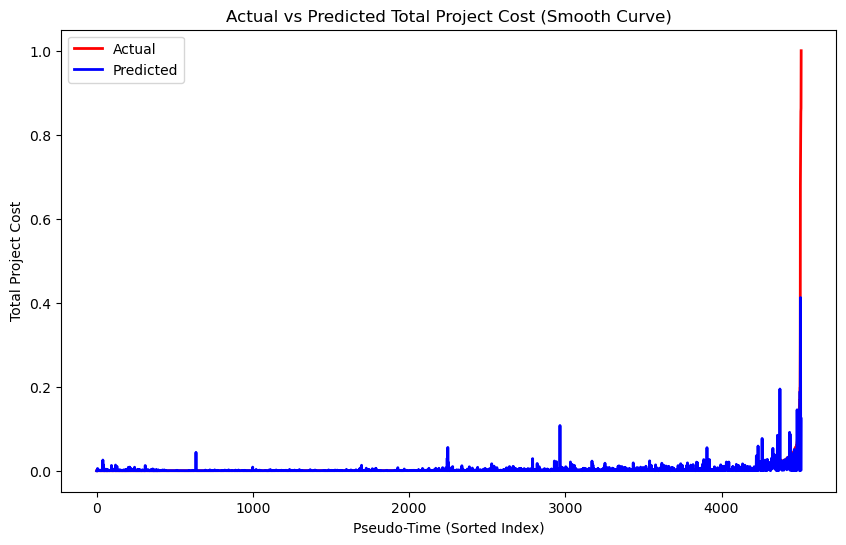

In [359]:
import numpy as np
import matplotlib.pyplot as plt

# Sort the actual values and predictions by the actual values to create a smooth curve
sorted_indices = np.argsort(y_test)  # Sort by actual values
y_test_sorted = np.array(y_test)[sorted_indices]
predictions_sorted = np.array(predictions_knn)[sorted_indices]

plt.figure(figsize=(10, 6))

# Plot sorted actual values in red
plt.plot(y_test_sorted, label='Actual', color='red', linewidth=2)

# Plot sorted predicted values in blue
plt.plot(predictions_sorted, label='Predicted', color='blue', linewidth=2)

# Adding labels and title
plt.xlabel('Pseudo-Time (Sorted Index)')
plt.ylabel('Total Project Cost')
plt.title('Actual vs Predicted Total Project Cost (Smooth Curve)')
plt.legend()
plt.show()

## Metric Results Of Algorithms

In [197]:
metrics_data = {
    'Model': ['Random Forest', 'Decision Tree', 'K-Nearest Neighbors'],
    'Mean Absolute Error (MAE)': [mae_rf, mae_dt, mae_knn],
    'Mean Squared Error (MSE)': [mse_rf, mse_dt, mse_knn],
    'R² Score': [r2_rf, r2_dt, r2_knn]
}

# convert to dataframe and display it as a table
metrics_df = pd.DataFrame(metrics_data)
metrics_df

Model  Mean Absolute Error (MAE)  Mean Squared Error (MSE)  \
0        Random Forest                   0.000753                  0.000242   
1        Decision Tree                   0.000442                  0.000198   
2  K-Nearest Neighbors                   0.002916                  0.000784   

   R² Score  
0  0.768161  
1  0.810064  
2  0.247049

The table shows that the Decision Tree model performs best with the lowest errors (MAE, MSE) and the highest R² score. This means that it captures the data patterns the best way and the most accurate way. 

The Random Forest model is also good but slightly less accurate. 

K-Nearest Neighbors has the worst performance overall, this is probably because it’s not suitable for our dataset.

# Hypertuning & Cross Validation

## Hypertuning Random Forest

In [201]:
from sklearn.model_selection import GridSearchCV

In [202]:
# Define the parameter grid to search for our random forest model
param_grid_random_forest = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Set up GridSearchCV with 5-fold cross-validation
grid_search_random_forest = GridSearchCV(
    estimator=model_random_forest,
    param_grid=param_grid_random_forest,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)

# Fit GridSearchCV to the training data
grid_search_random_forest.fit(X_train, y_train)

# Extract the best parameters and the best score
best_params_random_forest = grid_search_random_forest.best_params_
best_score_random_forest = -grid_search_random_forest.best_score_

print("Random Forest Hypertuning:")
print("Best Parameters For Random Forest:", best_params_random_forest)
print("Best Mean Cross-Validated MSE For Random Forest:", best_score_random_forest)

Random Forest Hypertuning:
Best Parameters For Random Forest: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best Mean Cross-Validated MSE For Random Forest: 0.00030108273923319944


## Hypertuning Decision Tree

In [204]:
# Define the parameter grid to search for our decision tree model
param_grid_decision_tree = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['sqrt', 'log2', None]
}

# Set up GridSearchCV with 5-fold cross-validation
grid_search_decision_tree = GridSearchCV(
    estimator=model_dt,
    param_grid=param_grid_decision_tree,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)

# Fit GridSearchCV to the training data
grid_search_decision_tree.fit(X_train, y_train)

# Extract the best parameters and the best score
best_params_decision_tree = grid_search_decision_tree.best_params_
best_score_decision_tree = -grid_search_decision_tree.best_score_  # Convert back to positive MSE

print("Decision Tree Hypertuning:")
print("Best Parameters For Our Decision Tree:", best_params_decision_tree)
print("Best Mean Cross-Validated MSE For Our Decision Tree:", best_score_decision_tree)


Decision Tree Hypertuning:
Best Parameters For Our Decision Tree: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 2}
Best Mean Cross-Validated MSE For Our Decision Tree: 0.00032487685128970077


## KNN Hypertuning

In [206]:
# Define the parameter grid to search for our KNN model
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Set up GridSearchCV with 5-fold cross-validation
grid_search_knn = GridSearchCV(
    estimator=knn_model,
    param_grid=param_grid_knn,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)

# Fit GridSearchCV to the scaled training data
grid_search_knn.fit(X_train, y_train)

# Get the best parameters and best score
best_params_knn = grid_search_knn.best_params_
best_score_knn = -grid_search_knn.best_score_

print("KNN Regressor Hyperparameter Tuning Results:")
print("Best Parameters For KNN:", best_params_knn)
print("Best Mean Cross-Validated MSE For KNN:", best_score_knn)

KNN Regressor Hyperparameter Tuning Results:
Best Parameters For KNN: {'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}
Best Mean Cross-Validated MSE For KNN: 0.0007947607537443774


## Hypertuning for top 10 features - Random Forest

In [208]:
# Define the parameter grid to search for our Random Forest model of 10 features
param_grid_rf_10 = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Set up GridSearchCV with the top 10 features and 5-fold cross-validation
grid_search_rf_10 = GridSearchCV(
    estimator=model_random_forest,
    param_grid=param_grid_rf_10,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)

# Fit GridSearchCV to the training data with only the top 10 features
grid_search_rf_10.fit(X_train_random_forest, y_train)

# Extract the best parameters and best score
best_params_rf_10 = grid_search_rf_10.best_params_
best_score_rf_10 = -grid_search_rf_10.best_score_  # Convert back to positive MSE

print("Random Forest Hypertuning (top 10):")
print("Best Parameters For Random Forest (top 10):", best_params_rf_10)
print("Best Mean Cross-Validated MSE For Random Forest (top 10):", best_score_rf_10)

Random Forest Hypertuning (top 10):
Best Parameters For Random Forest (top 10): {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best Mean Cross-Validated MSE For Random Forest (top 10): 0.0002689341337160428


## Hypertuning for top 10 features - Decision Tree

In [210]:
# Define the parameter grid to search for our Decision Tree model of 10 features
param_grid_dt_10 = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['sqrt', 'log2', None]
}

# Set up GridSearchCV with the top 10 features and 5-fold cross-validation
grid_search_dt_10 = GridSearchCV(
    estimator=model_dt,
    param_grid=param_grid_dt_10,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1
)

# Fit GridSearchCV to the training data
grid_search_dt_10.fit(X_train_decision_tree, y_train)

# Extract the best parameters and the best score
best_params_dt_10 = grid_search_dt_10.best_params_
best_score_dt_10 = -grid_search_dt_10.best_score_  # Convert back to positive MSE

print("Decision Tree Hypertuning (top 10):")
print("Best Parameters For Decision Tree (top 10):", best_params_dt_10)
print("Best Mean Cross-Validated MSE For Decision Tree (top 10):", best_score_dt_10)

Decision Tree Hypertuning (top 10):
Best Parameters For Decision Tree (top 10): {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Mean Cross-Validated MSE For Decision Tree (top 10): 0.000273250713609195


## Results

In [212]:
# Define the results for each model trained on the full data set
results_for_full_set_training = {
    "Model": ["Random Forest", "Decision Tree", "KNN Regressor"],
    "Best Parameters": [best_params_random_forest, best_params_decision_tree, best_params_knn],
    "Best Mean Cross-Validated MSE": [best_score_random_forest, best_score_decision_tree, best_score_knn],
    "Test MSE": [
        mean_squared_error(y_test, y_pred_random_forest), 
        mean_squared_error(y_test, y_pred_decision_tree), 
        mean_squared_error(y_test, predictions_knn)
    ]
}

# Create a DataFrame to display the results
results_for_full_set_training_df = pd.DataFrame(results_for_full_set_training)

# Display the DataFrame
print(results_for_full_set_training_df)

           Model                                    Best Parameters  \
0  Random Forest  {'max_depth': 10, 'max_features': None, 'min_s...   
1  Decision Tree  {'max_depth': None, 'max_features': 'sqrt', 'm...   
2  KNN Regressor  {'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}   

   Best Mean Cross-Validated MSE  Test MSE  
0                       0.000301  0.000238  
1                       0.000325  0.000233  
2                       0.000795  0.000784  


In [213]:
# Define the results for each model trained on the feature importance (top 10)
results_for_top_10_training = {
    "Model": ["Random Forest", "Decision Tree", "KNN Regressor"],
    "Best Parameters": [best_params_rf_10, best_params_dt_10, best_params_knn],
    "Best Mean Cross-Validated MSE": [best_score_rf_10, best_score_dt_10, best_score_knn],
    "Test MSE": [
        mean_squared_error(y_test, predictions_rf), 
        mean_squared_error(y_test, predictions_dt), 
        mean_squared_error(y_test, predictions_knn)
    ]
}

# Create a DataFrame to display the results
results_for_top_10_training_df = pd.DataFrame(results_for_top_10_training)

# Display the DataFrame
print(results_for_top_10_training_df)

           Model                                    Best Parameters  \
0  Random Forest  {'max_depth': None, 'max_features': 'sqrt', 'm...   
1  Decision Tree  {'max_depth': 5, 'max_features': None, 'min_sa...   
2  KNN Regressor  {'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}   

   Best Mean Cross-Validated MSE  Test MSE  
0                       0.000269  0.000242  
1                       0.000273  0.000198  
2                       0.000795  0.000784  


# Retraining Top 10 Features

In [215]:
# Define the top 10 features and target
top_10_features = ['Bridge Improvement Cost', 'Number of Spans in Main Unit', 'Roadway Improvement Cost',
                   'Latitude (decimal)', 'Average Relative Humidity', 'Inventory Route Total Horizontal Clearance (ft.)',
                   'Structure Length (ft.)', 'Out to Out (ft.)', 'Deck Area (sq. ft.)']
target = 'Total Project Cost'

# Select only the top 10 features from the dataset and separate the target
X = df_preprocessed[top_10_features]
y = df_preprocessed[target]

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the scaler
scaler_top10 = MinMaxScaler()

# Fit the scaler on the training data only
scaler_top10.fit(X_train)

# Transform both the training and testing data
X_train_scaled = scaler_top10.transform(X_train)
X_test_scaled = scaler_top10.transform(X_test)

# Initialize and train the Decision Tree Regressor on the scaled top 10 features
model_decision_tree = DecisionTreeRegressor(random_state=42)
model_decision_tree.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model_decision_tree.predict(X_test_scaled)

# Print or evaluate results
print(y_pred)


[0.001875 0.000352 0.000123 ... 0.000211 0.000352 0.000158]


# Export Statements

## Exporting the model

In [218]:
from joblib import dump

# We decided on decision tree with top 1 features to be our best model after testing on all models due to its best preformance
best_model_decision_tree = model_decision_tree

# Save the model to a file
dump(best_model_decision_tree, 'decision_tree_model.pkl')

print("Model saved as 'decision_tree_model.pkl'")

Model saved as 'decision_tree_model.pkl'


In [219]:
# Checking to see if our variable has the correct hyperparameters
print(best_model_decision_tree)

DecisionTreeRegressor(random_state=42)


## Exporting the column names

In [221]:
selected_columns_for_test_display = ['Bridge Improvement Cost', 'Number of Spans in Main Unit', 'Roadway Improvement Cost',
 'Latitude (decimal)', 'Average Relative Humidity', 'Inventory Route Total Horizontal Clearance (ft.)',
 'Structure Length (ft.)', 'Out to Out (ft.)', 'Deck Area (sq. ft.)', 'Congressional District Number_5-10', 'Total Project Cost']

# Create a new DataFrame with only the selected columns
df_selected = df_preprocessed[selected_columns_for_test_display]

In [222]:
df_selected.head(10)

Bridge Improvement Cost  Number of Spans in Main Unit  \
0                 0.000244                      0.009615   
1                 0.000244                      0.009615   
2                 0.000244                      0.009615   
3                 0.000687                      0.028846   
4                 0.000481                      0.038462   
5                 0.005737                      0.028846   
6                 0.000041                      0.125000   
7                 0.011526                      0.028846   
8                 0.014149                      0.596154   
9                 0.008093                      0.028846   

   Roadway Improvement Cost  Latitude (decimal)  Average Relative Humidity  \
0                  0.000277            0.993535                   0.571429   
1                  0.000277            0.998106                   0.571429   
2                  0.000277            0.998682                   0.571429   
3                  0.000687            0.914914                   0.428571   
4                  0.000482            0.914571                   0.428571   
5                  0.005738            0.914840                   0.428571   
6                  0.000041            0.914984                   0.428571   
7                  0.011517            0.914906                   0.285714   
8                  0.014151            0.915464                   0.285714   
9                  0.008095            0.914947                   0.285714   

   Inventory Route Total Horizontal Clearance (ft.)  Structure Length (ft.)  \
0                                          0.602897                0.000521   
1                                          0.602897                0.000521   
2                                          0.100785                0.004869   
3                                          0.409777                0.010292   
4                                          0.156307                0.011334   
5                                          0.168377                0.159998   
6                                          0.162342                0.144350   
7                                          0.180447                0.012002   
8                                          0.180447                0.397883   
9                                          0.433917                0.145845   

   Out to Out (ft.)  Deck Area (sq. ft.)  Congressional District Number_5-10  \
0          0.000000             0.000178                                 1.0   
1          0.000000             0.000245                                 1.0   
2          0.023073             0.001032                                 1.0   
3          0.115219             0.011962                                 0.0   
4          0.039553             0.004209                                 0.0   
5          0.049298             0.067924                                 0.0   
6          0.043709             0.054289                                 0.0   
7          0.057323             0.006607                                 0.0   
8          0.051304             0.174465                                 0.0   
9          0.107624             0.135583                                 0.0   

   Total Project Cost  
0            0.000362  
1            0.000362  
2            0.000083  
3            0.001005  
4            0.000703  
5            0.008399  
6            0.000060  
7            0.016872  
8            0.020712  
9            0.011847

In [223]:
selected_columns_for_api = ['Bridge Improvement Cost', 'Number of Spans in Main Unit', 'Roadway Improvement Cost',
 'Latitude (decimal)', 'Average Relative Humidity', 'Inventory Route Total Horizontal Clearance (ft.)',
 'Structure Length (ft.)', 'Out to Out (ft.)', 'Deck Area (sq. ft.)']

dump(selected_columns_for_api, 'column_names.pkl')

['column_names.pkl']

## Export the scaler

In [225]:
dump(scaler_top10, 'scaler_top10.pkl')

['scaler_top10.pkl']